### Data Loader Test

Let's test the data loader we created

In [1]:
# ! python -m pip install ipywidgets widgetsnbextension pandas-profiling

In [2]:
# !jupyter nbextension enable --py widgetsnbextension

In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
from dataloader_new import AnimeDataLoader, AnimeGAN

In [4]:
# data_dir = "/home/mgfos207/Desktop/PetProjects/DLDataPreproccessing/test_faces_split/train"
data_dir = "/home/mgfos207/Desktop/PetProjects/DLDataPreproccessing/test_faces_split_new/train"
anime_data_loader = AnimeDataLoader((64,64), 128, data_dir)

In [5]:
ngpu = 1
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [6]:
# xb = torch.randn(128, 128, 1, 1) #
image_size = 64
batch_size = 128
latent_size = 64
xb = torch.randn(batch_size, latent_size, 1, 1)

In [7]:
devxb = xb.to(device)

In [8]:
gan = AnimeGAN(anime_data_loader.data_loader, devxb)

In [9]:
gen = gan.generator

In [10]:
# fake_imgs = gen(xb)
fake_imgs = gen(devxb)

In [11]:
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [12]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]


In [13]:
gan.fit(1200, .00003)

  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1/1200], loss_g: 5.9311, loss_d: 0.0413, real_score: 0.9773, fake_score: 0.0111


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [2/1200], loss_g: 9.3316, loss_d: 0.0638, real_score: 0.9588, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [3/1200], loss_g: 4.5488, loss_d: 0.1976, real_score: 0.8979, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [4/1200], loss_g: 5.7707, loss_d: 0.0155, real_score: 0.9940, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [5/1200], loss_g: 5.1900, loss_d: 0.0888, real_score: 0.9637, fake_score: 0.0388


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [6/1200], loss_g: 8.0757, loss_d: 0.2529, real_score: 0.9629, fake_score: 0.1817


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [7/1200], loss_g: 6.1656, loss_d: 0.2459, real_score: 0.9681, fake_score: 0.1732


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [8/1200], loss_g: 3.4219, loss_d: 0.1645, real_score: 0.9177, fake_score: 0.0506


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [9/1200], loss_g: 3.3830, loss_d: 0.1637, real_score: 0.9257, fake_score: 0.0713


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [10/1200], loss_g: 5.1002, loss_d: 0.1864, real_score: 0.9658, fake_score: 0.1335


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [11/1200], loss_g: 4.4688, loss_d: 0.1782, real_score: 0.9687, fake_score: 0.1281


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [12/1200], loss_g: 3.1851, loss_d: 0.1373, real_score: 0.9256, fake_score: 0.0516


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [13/1200], loss_g: 1.1935, loss_d: 1.0439, real_score: 0.4499, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [14/1200], loss_g: 4.4068, loss_d: 0.1532, real_score: 0.9695, fake_score: 0.1105


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [15/1200], loss_g: 3.5462, loss_d: 0.1164, real_score: 0.9521, fake_score: 0.0607


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [16/1200], loss_g: 4.2718, loss_d: 0.1067, real_score: 0.9774, fake_score: 0.0771


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [17/1200], loss_g: 4.0674, loss_d: 0.1206, real_score: 0.9176, fake_score: 0.0212


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [18/1200], loss_g: 4.2326, loss_d: 0.0907, real_score: 0.9642, fake_score: 0.0503


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [19/1200], loss_g: 4.0156, loss_d: 0.0637, real_score: 0.9705, fake_score: 0.0319


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [20/1200], loss_g: 4.6311, loss_d: 0.0499, real_score: 0.9709, fake_score: 0.0184


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [21/1200], loss_g: 4.9439, loss_d: 0.0974, real_score: 0.9756, fake_score: 0.0662


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [22/1200], loss_g: 4.9585, loss_d: 0.1116, real_score: 0.9827, fake_score: 0.0843


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [23/1200], loss_g: 4.4124, loss_d: 0.0668, real_score: 0.9573, fake_score: 0.0195


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [24/1200], loss_g: 7.8246, loss_d: 0.1329, real_score: 0.9953, fake_score: 0.1140


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [25/1200], loss_g: 6.4172, loss_d: 0.0797, real_score: 0.9365, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [26/1200], loss_g: 5.1871, loss_d: 0.0320, real_score: 0.9786, fake_score: 0.0095


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [27/1200], loss_g: 4.0187, loss_d: 0.1019, real_score: 0.9341, fake_score: 0.0201


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [28/1200], loss_g: 6.6142, loss_d: 0.1144, real_score: 0.9791, fake_score: 0.0826


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [29/1200], loss_g: 4.7655, loss_d: 0.3926, real_score: 0.7707, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [30/1200], loss_g: 11.0893, loss_d: 0.1261, real_score: 0.9042, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [31/1200], loss_g: 3.9275, loss_d: 0.0581, real_score: 0.9711, fake_score: 0.0219


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [32/1200], loss_g: 4.7875, loss_d: 0.0434, real_score: 0.9774, fake_score: 0.0163


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [33/1200], loss_g: 4.9315, loss_d: 0.0341, real_score: 0.9786, fake_score: 0.0113


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [34/1200], loss_g: 2.5942, loss_d: 0.1490, real_score: 0.8985, fake_score: 0.0238


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [35/1200], loss_g: 5.9259, loss_d: 0.0521, real_score: 0.9711, fake_score: 0.0191


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [36/1200], loss_g: 5.9628, loss_d: 0.0702, real_score: 0.9430, fake_score: 0.0045


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [37/1200], loss_g: 5.3667, loss_d: 0.0497, real_score: 0.9881, fake_score: 0.0346


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [38/1200], loss_g: 5.9890, loss_d: 0.0930, real_score: 0.9315, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [39/1200], loss_g: 7.1183, loss_d: 0.0273, real_score: 0.9844, fake_score: 0.0107


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [40/1200], loss_g: 0.4791, loss_d: 0.4079, real_score: 0.7669, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [41/1200], loss_g: 3.6162, loss_d: 0.0798, real_score: 0.9603, fake_score: 0.0293


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [42/1200], loss_g: 4.9810, loss_d: 0.0429, real_score: 0.9779, fake_score: 0.0190


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [43/1200], loss_g: 5.6548, loss_d: 0.0707, real_score: 0.9732, fake_score: 0.0384


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [44/1200], loss_g: 5.6592, loss_d: 0.0300, real_score: 0.9809, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [45/1200], loss_g: 5.2684, loss_d: 0.0706, real_score: 0.9686, fake_score: 0.0343


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [46/1200], loss_g: 3.7980, loss_d: 0.0748, real_score: 0.9560, fake_score: 0.0151


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [47/1200], loss_g: 5.0925, loss_d: 0.0379, real_score: 0.9943, fake_score: 0.0304


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [48/1200], loss_g: 6.8251, loss_d: 0.0978, real_score: 0.9929, fake_score: 0.0777


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [49/1200], loss_g: 5.1442, loss_d: 0.0285, real_score: 0.9954, fake_score: 0.0229


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [50/1200], loss_g: 5.1513, loss_d: 0.0387, real_score: 0.9785, fake_score: 0.0148


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [51/1200], loss_g: 6.2127, loss_d: 0.1028, real_score: 0.9916, fake_score: 0.0786


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [52/1200], loss_g: 4.8344, loss_d: 0.0655, real_score: 0.9554, fake_score: 0.0129


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [53/1200], loss_g: 5.2287, loss_d: 0.0481, real_score: 0.9699, fake_score: 0.0109


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [54/1200], loss_g: 5.4915, loss_d: 0.0782, real_score: 0.9698, fake_score: 0.0401


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [55/1200], loss_g: 6.1833, loss_d: 0.0501, real_score: 0.9638, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [56/1200], loss_g: 4.7323, loss_d: 0.0940, real_score: 0.9595, fake_score: 0.0326


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [57/1200], loss_g: 4.6554, loss_d: 0.0375, real_score: 0.9719, fake_score: 0.0065


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [58/1200], loss_g: 5.9751, loss_d: 0.0280, real_score: 0.9845, fake_score: 0.0114


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [59/1200], loss_g: 5.6281, loss_d: 0.0212, real_score: 0.9917, fake_score: 0.0122


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [60/1200], loss_g: 3.6307, loss_d: 0.0680, real_score: 0.9712, fake_score: 0.0334


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [61/1200], loss_g: 5.8817, loss_d: 0.0481, real_score: 0.9728, fake_score: 0.0093


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [62/1200], loss_g: 5.4633, loss_d: 0.0278, real_score: 0.9888, fake_score: 0.0157


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [63/1200], loss_g: 3.8783, loss_d: 0.0802, real_score: 0.9539, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [64/1200], loss_g: 4.9271, loss_d: 0.0397, real_score: 0.9744, fake_score: 0.0063


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [65/1200], loss_g: 5.3034, loss_d: 0.0583, real_score: 0.9783, fake_score: 0.0271


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [66/1200], loss_g: 6.0066, loss_d: 0.0516, real_score: 0.9632, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [67/1200], loss_g: 4.8665, loss_d: 0.0560, real_score: 0.9740, fake_score: 0.0201


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [68/1200], loss_g: 4.3855, loss_d: 0.0585, real_score: 0.9684, fake_score: 0.0130


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [69/1200], loss_g: 5.9130, loss_d: 0.0999, real_score: 0.9827, fake_score: 0.0668


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [70/1200], loss_g: 5.9643, loss_d: 0.0711, real_score: 0.9554, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [71/1200], loss_g: 5.6772, loss_d: 0.0181, real_score: 0.9988, fake_score: 0.0162


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [72/1200], loss_g: 3.9270, loss_d: 0.0917, real_score: 0.9367, fake_score: 0.0088


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [73/1200], loss_g: 9.3730, loss_d: 0.0578, real_score: 0.9941, fake_score: 0.0438


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [74/1200], loss_g: 5.9778, loss_d: 0.0751, real_score: 0.9895, fake_score: 0.0584


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [75/1200], loss_g: 4.2594, loss_d: 0.0852, real_score: 0.9445, fake_score: 0.0100


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [76/1200], loss_g: 4.6044, loss_d: 0.0699, real_score: 0.9683, fake_score: 0.0204


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [77/1200], loss_g: 6.0952, loss_d: 0.0318, real_score: 0.9896, fake_score: 0.0201


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [78/1200], loss_g: 5.1867, loss_d: 0.0549, real_score: 0.9711, fake_score: 0.0106


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [79/1200], loss_g: 5.1381, loss_d: 0.0386, real_score: 0.9739, fake_score: 0.0090


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [80/1200], loss_g: 4.3136, loss_d: 0.0755, real_score: 0.9540, fake_score: 0.0148


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [81/1200], loss_g: 6.3817, loss_d: 0.0350, real_score: 0.9767, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [82/1200], loss_g: 7.1850, loss_d: 0.0361, real_score: 0.9894, fake_score: 0.0243


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [83/1200], loss_g: 6.0271, loss_d: 0.0199, real_score: 0.9959, fake_score: 0.0148


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [84/1200], loss_g: 5.7097, loss_d: 0.0151, real_score: 0.9973, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [85/1200], loss_g: 3.8201, loss_d: 0.1016, real_score: 0.9390, fake_score: 0.0158


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [86/1200], loss_g: 6.8242, loss_d: 0.0201, real_score: 0.9958, fake_score: 0.0156


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [87/1200], loss_g: 5.3843, loss_d: 0.0305, real_score: 0.9907, fake_score: 0.0202


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [88/1200], loss_g: 4.9784, loss_d: 0.0308, real_score: 0.9916, fake_score: 0.0214


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [89/1200], loss_g: 6.8158, loss_d: 0.0348, real_score: 0.9949, fake_score: 0.0284


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [90/1200], loss_g: 5.4848, loss_d: 0.0550, real_score: 0.9874, fake_score: 0.0398


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [91/1200], loss_g: 7.7518, loss_d: 0.0142, real_score: 0.9922, fake_score: 0.0058


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [92/1200], loss_g: 4.3275, loss_d: 0.0543, real_score: 0.9654, fake_score: 0.0158


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [93/1200], loss_g: 5.8749, loss_d: 0.0294, real_score: 0.9914, fake_score: 0.0198


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [94/1200], loss_g: 5.2618, loss_d: 0.0410, real_score: 0.9752, fake_score: 0.0132


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [95/1200], loss_g: 6.3142, loss_d: 0.0537, real_score: 0.9768, fake_score: 0.0234


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [96/1200], loss_g: 14.9378, loss_d: 0.0078, real_score: 0.9995, fake_score: 0.0072


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [97/1200], loss_g: 10.5388, loss_d: 0.0459, real_score: 0.9917, fake_score: 0.0331


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [98/1200], loss_g: 5.0827, loss_d: 0.0395, real_score: 0.9855, fake_score: 0.0216


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [99/1200], loss_g: 8.5135, loss_d: 0.0368, real_score: 0.9855, fake_score: 0.0149


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [100/1200], loss_g: 5.7841, loss_d: 0.0351, real_score: 0.9851, fake_score: 0.0183


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [101/1200], loss_g: 5.7682, loss_d: 0.0178, real_score: 0.9904, fake_score: 0.0076


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [102/1200], loss_g: 5.0945, loss_d: 0.0456, real_score: 0.9662, fake_score: 0.0036


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [103/1200], loss_g: 5.4584, loss_d: 0.0632, real_score: 0.9650, fake_score: 0.0218


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [104/1200], loss_g: 5.8825, loss_d: 0.0268, real_score: 0.9946, fake_score: 0.0207


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [105/1200], loss_g: 5.8262, loss_d: 0.0477, real_score: 0.9780, fake_score: 0.0199


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [106/1200], loss_g: 8.0069, loss_d: 0.1310, real_score: 0.9772, fake_score: 0.0956


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [107/1200], loss_g: 6.8547, loss_d: 0.0414, real_score: 0.9989, fake_score: 0.0381


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [108/1200], loss_g: 6.8719, loss_d: 0.0553, real_score: 0.9833, fake_score: 0.0338


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [109/1200], loss_g: 7.2547, loss_d: 0.0655, real_score: 0.9508, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [110/1200], loss_g: 5.7406, loss_d: 0.0615, real_score: 0.9824, fake_score: 0.0391


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [111/1200], loss_g: 6.4287, loss_d: 0.0254, real_score: 0.9801, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [112/1200], loss_g: 4.4515, loss_d: 0.1086, real_score: 0.9499, fake_score: 0.0113


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [113/1200], loss_g: 6.8128, loss_d: 0.0280, real_score: 0.9791, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [114/1200], loss_g: 5.0368, loss_d: 0.0509, real_score: 0.9631, fake_score: 0.0072


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [115/1200], loss_g: 5.8564, loss_d: 0.0272, real_score: 0.9860, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [116/1200], loss_g: 7.6380, loss_d: 0.0222, real_score: 0.9825, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [117/1200], loss_g: 6.3992, loss_d: 0.0143, real_score: 0.9943, fake_score: 0.0084


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [118/1200], loss_g: 7.1634, loss_d: 0.0398, real_score: 0.9877, fake_score: 0.0254


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [119/1200], loss_g: 7.4527, loss_d: 0.0866, real_score: 0.9750, fake_score: 0.0512


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [120/1200], loss_g: 5.1689, loss_d: 0.0735, real_score: 0.9645, fake_score: 0.0087


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [121/1200], loss_g: 4.1339, loss_d: 0.0992, real_score: 0.9309, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [122/1200], loss_g: 10.8344, loss_d: 0.0295, real_score: 0.9777, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [123/1200], loss_g: 5.8525, loss_d: 0.0551, real_score: 0.9718, fake_score: 0.0199


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [124/1200], loss_g: 5.0644, loss_d: 0.0649, real_score: 0.9596, fake_score: 0.0064


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [125/1200], loss_g: 8.6249, loss_d: 0.1811, real_score: 0.9186, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [126/1200], loss_g: 6.8922, loss_d: 0.0371, real_score: 0.9884, fake_score: 0.0235


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [127/1200], loss_g: 9.6468, loss_d: 0.0971, real_score: 0.9901, fake_score: 0.0787


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [128/1200], loss_g: 7.2183, loss_d: 0.0334, real_score: 0.9893, fake_score: 0.0216


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [129/1200], loss_g: 6.1482, loss_d: 0.0227, real_score: 0.9989, fake_score: 0.0203


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [130/1200], loss_g: 4.5927, loss_d: 0.0585, real_score: 0.9713, fake_score: 0.0161


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [131/1200], loss_g: 3.2479, loss_d: 0.1197, real_score: 0.9231, fake_score: 0.0117


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [132/1200], loss_g: 8.6010, loss_d: 0.0476, real_score: 0.9893, fake_score: 0.0316


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [133/1200], loss_g: 5.0147, loss_d: 0.0376, real_score: 0.9741, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [134/1200], loss_g: 4.0804, loss_d: 0.0706, real_score: 0.9520, fake_score: 0.0138


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [135/1200], loss_g: 5.9210, loss_d: 0.0307, real_score: 0.9986, fake_score: 0.0283


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [136/1200], loss_g: 6.7044, loss_d: 0.0220, real_score: 0.9917, fake_score: 0.0131


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [137/1200], loss_g: 5.3860, loss_d: 0.0514, real_score: 0.9649, fake_score: 0.0107


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [138/1200], loss_g: 6.9602, loss_d: 0.0581, real_score: 0.9741, fake_score: 0.0052


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [139/1200], loss_g: 5.8540, loss_d: 0.1831, real_score: 0.8766, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [140/1200], loss_g: 6.3925, loss_d: 0.0140, real_score: 0.9965, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [141/1200], loss_g: 6.8852, loss_d: 0.0214, real_score: 0.9848, fake_score: 0.0047


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [142/1200], loss_g: 14.4870, loss_d: 0.1659, real_score: 0.9959, fake_score: 0.1395


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [143/1200], loss_g: 5.7130, loss_d: 0.0138, real_score: 0.9921, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [144/1200], loss_g: 8.7006, loss_d: 0.0179, real_score: 0.9853, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [145/1200], loss_g: 8.4697, loss_d: 0.0986, real_score: 0.9961, fake_score: 0.0849


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [146/1200], loss_g: 4.1787, loss_d: 0.0778, real_score: 0.9672, fake_score: 0.0243


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [147/1200], loss_g: 4.7058, loss_d: 0.0486, real_score: 0.9718, fake_score: 0.0101


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [148/1200], loss_g: 4.5719, loss_d: 0.0555, real_score: 0.9660, fake_score: 0.0150


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [149/1200], loss_g: 7.4422, loss_d: 0.0665, real_score: 0.9876, fake_score: 0.0406


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [150/1200], loss_g: 6.8794, loss_d: 0.0210, real_score: 0.9842, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [151/1200], loss_g: 5.8404, loss_d: 0.0114, real_score: 0.9975, fake_score: 0.0087


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [152/1200], loss_g: 5.7371, loss_d: 0.0389, real_score: 0.9822, fake_score: 0.0174


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [153/1200], loss_g: 3.4993, loss_d: 0.0583, real_score: 0.9765, fake_score: 0.0074


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [154/1200], loss_g: 7.3430, loss_d: 0.0104, real_score: 0.9916, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [155/1200], loss_g: 6.7740, loss_d: 0.0326, real_score: 0.9974, fake_score: 0.0289


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [156/1200], loss_g: 5.3268, loss_d: 0.0244, real_score: 0.9877, fake_score: 0.0080


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [157/1200], loss_g: 6.5294, loss_d: 0.0249, real_score: 0.9961, fake_score: 0.0204


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [158/1200], loss_g: 9.8274, loss_d: 0.1105, real_score: 0.9956, fake_score: 0.0947


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [159/1200], loss_g: 4.0853, loss_d: 0.0422, real_score: 0.9813, fake_score: 0.0122


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [160/1200], loss_g: 6.9516, loss_d: 0.0509, real_score: 0.9784, fake_score: 0.0088


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [161/1200], loss_g: 7.2780, loss_d: 0.0251, real_score: 0.9967, fake_score: 0.0212


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [162/1200], loss_g: 5.2265, loss_d: 0.0088, real_score: 0.9979, fake_score: 0.0066


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [163/1200], loss_g: 6.2876, loss_d: 0.0572, real_score: 0.9843, fake_score: 0.0093


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [164/1200], loss_g: 6.2668, loss_d: 0.0172, real_score: 0.9873, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [165/1200], loss_g: 3.6773, loss_d: 0.0550, real_score: 0.9641, fake_score: 0.0125


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [166/1200], loss_g: 8.8365, loss_d: 0.1173, real_score: 0.9268, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [167/1200], loss_g: 6.9402, loss_d: 0.0266, real_score: 0.9967, fake_score: 0.0227


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [168/1200], loss_g: 7.0105, loss_d: 0.0272, real_score: 0.9910, fake_score: 0.0142


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [169/1200], loss_g: 6.2636, loss_d: 0.0243, real_score: 0.9825, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [170/1200], loss_g: 6.7930, loss_d: 0.0410, real_score: 0.9807, fake_score: 0.0199


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [171/1200], loss_g: 20.5866, loss_d: 0.0173, real_score: 0.9924, fake_score: 0.0088


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [172/1200], loss_g: 5.6946, loss_d: 0.0327, real_score: 0.9817, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [173/1200], loss_g: 4.0898, loss_d: 0.0211, real_score: 0.9916, fake_score: 0.0117


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [174/1200], loss_g: 7.3637, loss_d: 0.0126, real_score: 0.9920, fake_score: 0.0036


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [175/1200], loss_g: 6.8419, loss_d: 0.0359, real_score: 0.9783, fake_score: 0.0080


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [176/1200], loss_g: 10.1356, loss_d: 0.0697, real_score: 0.9931, fake_score: 0.0531


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [177/1200], loss_g: 7.7842, loss_d: 0.0308, real_score: 0.9996, fake_score: 0.0263


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [178/1200], loss_g: 5.7667, loss_d: 0.0425, real_score: 0.9779, fake_score: 0.0054


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [179/1200], loss_g: 5.4102, loss_d: 0.0227, real_score: 0.9856, fake_score: 0.0072


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [180/1200], loss_g: 9.6682, loss_d: 0.0104, real_score: 0.9983, fake_score: 0.0078


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [181/1200], loss_g: 10.5689, loss_d: 0.0065, real_score: 0.9998, fake_score: 0.0063


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [182/1200], loss_g: 4.9358, loss_d: 0.0907, real_score: 0.9395, fake_score: 0.0076


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [183/1200], loss_g: 13.0170, loss_d: 0.0179, real_score: 0.9852, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [184/1200], loss_g: 6.9911, loss_d: 0.0021, real_score: 0.9998, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [185/1200], loss_g: 8.8931, loss_d: 0.0091, real_score: 0.9945, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [186/1200], loss_g: 4.6551, loss_d: 0.0305, real_score: 0.9753, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [187/1200], loss_g: 10.3057, loss_d: 0.0020, real_score: 0.9995, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [188/1200], loss_g: 6.7939, loss_d: 0.0304, real_score: 0.9928, fake_score: 0.0201


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [189/1200], loss_g: 5.7401, loss_d: 0.0109, real_score: 0.9928, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [190/1200], loss_g: 7.4017, loss_d: 0.0085, real_score: 0.9975, fake_score: 0.0058


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [191/1200], loss_g: 5.1530, loss_d: 0.0116, real_score: 0.9942, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [192/1200], loss_g: 4.2220, loss_d: 0.0587, real_score: 0.9629, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [193/1200], loss_g: 6.8672, loss_d: 0.0124, real_score: 0.9922, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [194/1200], loss_g: 13.7053, loss_d: 0.0371, real_score: 0.9714, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [195/1200], loss_g: 4.7785, loss_d: 0.0318, real_score: 0.9914, fake_score: 0.0216


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [196/1200], loss_g: 7.7713, loss_d: 0.0638, real_score: 0.9980, fake_score: 0.0559


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [197/1200], loss_g: 7.1989, loss_d: 0.1309, real_score: 0.9115, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [198/1200], loss_g: 5.7838, loss_d: 0.0248, real_score: 0.9861, fake_score: 0.0087


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [199/1200], loss_g: 9.7454, loss_d: 0.0233, real_score: 0.9846, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [200/1200], loss_g: 21.4371, loss_d: 0.0010, real_score: 1.0000, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [201/1200], loss_g: 6.9631, loss_d: 0.0352, real_score: 0.9928, fake_score: 0.0268


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [202/1200], loss_g: 5.7069, loss_d: 0.1283, real_score: 0.9080, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [203/1200], loss_g: 5.7231, loss_d: 0.0068, real_score: 0.9958, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [204/1200], loss_g: 20.9095, loss_d: 0.0084, real_score: 0.9955, fake_score: 0.0036


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [205/1200], loss_g: 6.6505, loss_d: 0.2533, real_score: 0.8622, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [206/1200], loss_g: 8.8284, loss_d: 0.0421, real_score: 0.9832, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [207/1200], loss_g: 5.3156, loss_d: 0.1177, real_score: 0.9646, fake_score: 0.0134


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [208/1200], loss_g: 6.9455, loss_d: 0.0044, real_score: 0.9970, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [209/1200], loss_g: 22.7956, loss_d: 0.0149, real_score: 1.0000, fake_score: 0.0100


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [210/1200], loss_g: 5.9510, loss_d: 0.0277, real_score: 0.9865, fake_score: 0.0130


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [211/1200], loss_g: 22.4430, loss_d: 0.0224, real_score: 0.9848, fake_score: 0.0047


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [212/1200], loss_g: 6.9484, loss_d: 0.0201, real_score: 0.9915, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [213/1200], loss_g: 5.5571, loss_d: 0.0264, real_score: 0.9849, fake_score: 0.0093


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [214/1200], loss_g: 8.3254, loss_d: 0.0514, real_score: 0.9624, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [215/1200], loss_g: 9.0192, loss_d: 0.0242, real_score: 0.9827, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [216/1200], loss_g: 9.3194, loss_d: 0.0398, real_score: 0.9950, fake_score: 0.0328


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [217/1200], loss_g: 7.4947, loss_d: 0.0116, real_score: 0.9901, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [218/1200], loss_g: 39.1125, loss_d: 0.0515, real_score: 0.9694, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [219/1200], loss_g: 5.8240, loss_d: 0.0233, real_score: 0.9927, fake_score: 0.0149


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [220/1200], loss_g: 6.9762, loss_d: 0.0048, real_score: 0.9992, fake_score: 0.0040


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [221/1200], loss_g: 4.1596, loss_d: 0.0484, real_score: 0.9681, fake_score: 0.0113


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [222/1200], loss_g: 7.8972, loss_d: 0.0199, real_score: 0.9922, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [223/1200], loss_g: 3.6987, loss_d: 0.0479, real_score: 0.9643, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [224/1200], loss_g: 5.2255, loss_d: 0.0697, real_score: 0.9696, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [225/1200], loss_g: 5.8678, loss_d: 0.0244, real_score: 0.9915, fake_score: 0.0150


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [226/1200], loss_g: 6.1778, loss_d: 0.0145, real_score: 0.9914, fake_score: 0.0046


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [227/1200], loss_g: 8.5743, loss_d: 0.0291, real_score: 0.9983, fake_score: 0.0256


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [228/1200], loss_g: 7.4020, loss_d: 0.0228, real_score: 0.9881, fake_score: 0.0093


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [229/1200], loss_g: 6.6524, loss_d: 0.0336, real_score: 0.9973, fake_score: 0.0300


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [230/1200], loss_g: 5.3542, loss_d: 0.0511, real_score: 0.9755, fake_score: 0.0121


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [231/1200], loss_g: 6.7568, loss_d: 0.0192, real_score: 0.9889, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [232/1200], loss_g: 4.7664, loss_d: 0.0191, real_score: 0.9847, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [233/1200], loss_g: 7.0513, loss_d: 0.0224, real_score: 0.9932, fake_score: 0.0151


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [234/1200], loss_g: 18.3757, loss_d: 0.0494, real_score: 0.9998, fake_score: 0.0399


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [235/1200], loss_g: 18.3514, loss_d: 0.0286, real_score: 0.9815, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [236/1200], loss_g: 5.8010, loss_d: 0.0412, real_score: 0.9845, fake_score: 0.0083


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [237/1200], loss_g: 5.8683, loss_d: 0.0196, real_score: 0.9892, fake_score: 0.0082


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [238/1200], loss_g: 5.6531, loss_d: 0.0157, real_score: 0.9885, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [239/1200], loss_g: 6.5352, loss_d: 0.0372, real_score: 0.9784, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [240/1200], loss_g: 8.8444, loss_d: 0.0591, real_score: 0.9853, fake_score: 0.0402


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [241/1200], loss_g: 7.4821, loss_d: 0.0152, real_score: 0.9903, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [242/1200], loss_g: 8.1007, loss_d: 0.0453, real_score: 0.9887, fake_score: 0.0302


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [243/1200], loss_g: 7.7879, loss_d: 0.0079, real_score: 0.9994, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [244/1200], loss_g: 6.2279, loss_d: 0.0280, real_score: 0.9943, fake_score: 0.0212


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [245/1200], loss_g: 4.9034, loss_d: 0.0354, real_score: 0.9758, fake_score: 0.0087


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [246/1200], loss_g: 7.3000, loss_d: 0.0159, real_score: 0.9953, fake_score: 0.0109


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [247/1200], loss_g: 6.7632, loss_d: 0.0089, real_score: 0.9975, fake_score: 0.0060


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [248/1200], loss_g: 7.3177, loss_d: 0.0034, real_score: 0.9987, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [249/1200], loss_g: 19.4876, loss_d: 0.1219, real_score: 0.9983, fake_score: 0.0989


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [250/1200], loss_g: 7.2212, loss_d: 0.0249, real_score: 0.9988, fake_score: 0.0230


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [251/1200], loss_g: 8.7921, loss_d: 0.0239, real_score: 0.9841, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [252/1200], loss_g: 3.6256, loss_d: 0.0532, real_score: 0.9664, fake_score: 0.0092


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [253/1200], loss_g: 9.2684, loss_d: 0.0324, real_score: 0.9965, fake_score: 0.0268


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [254/1200], loss_g: 6.7928, loss_d: 0.0251, real_score: 0.9937, fake_score: 0.0177


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [255/1200], loss_g: 10.0892, loss_d: 0.0355, real_score: 0.9735, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [256/1200], loss_g: 9.0525, loss_d: 0.0032, real_score: 0.9981, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [257/1200], loss_g: 6.1101, loss_d: 0.0135, real_score: 0.9996, fake_score: 0.0129


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [258/1200], loss_g: 11.6686, loss_d: 0.0254, real_score: 0.9773, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [259/1200], loss_g: 6.4702, loss_d: 0.0227, real_score: 0.9923, fake_score: 0.0129


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [260/1200], loss_g: 6.7686, loss_d: 0.0309, real_score: 0.9863, fake_score: 0.0075


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [261/1200], loss_g: 38.1402, loss_d: 0.0033, real_score: 0.9988, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [262/1200], loss_g: 9.8840, loss_d: 0.0130, real_score: 0.9903, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [263/1200], loss_g: 7.2242, loss_d: 0.0324, real_score: 0.9952, fake_score: 0.0259


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [264/1200], loss_g: 8.4830, loss_d: 0.0094, real_score: 0.9928, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [265/1200], loss_g: 8.4497, loss_d: 0.0055, real_score: 0.9959, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [266/1200], loss_g: 5.4910, loss_d: 0.0193, real_score: 0.9936, fake_score: 0.0114


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [267/1200], loss_g: 6.9698, loss_d: 0.0558, real_score: 0.9644, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [268/1200], loss_g: 5.5821, loss_d: 0.0171, real_score: 0.9916, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [269/1200], loss_g: 7.2793, loss_d: 0.0072, real_score: 0.9985, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [270/1200], loss_g: 5.6555, loss_d: 0.0199, real_score: 0.9918, fake_score: 0.0103


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [271/1200], loss_g: 6.8315, loss_d: 0.0055, real_score: 0.9988, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [272/1200], loss_g: 8.4867, loss_d: 0.0429, real_score: 0.9983, fake_score: 0.0393


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [273/1200], loss_g: 7.4579, loss_d: 0.0125, real_score: 0.9914, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [274/1200], loss_g: 7.5155, loss_d: 0.0064, real_score: 0.9955, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [275/1200], loss_g: 6.3045, loss_d: 0.0196, real_score: 0.9947, fake_score: 0.0135


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [276/1200], loss_g: 6.9393, loss_d: 0.0024, real_score: 0.9989, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [277/1200], loss_g: 3.3596, loss_d: 0.0582, real_score: 0.9673, fake_score: 0.0115


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [278/1200], loss_g: 7.5028, loss_d: 0.0403, real_score: 0.9830, fake_score: 0.0186


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [279/1200], loss_g: 10.1056, loss_d: 0.0079, real_score: 0.9928, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [280/1200], loss_g: 6.7212, loss_d: 0.0147, real_score: 0.9982, fake_score: 0.0126


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [281/1200], loss_g: 8.2816, loss_d: 0.0513, real_score: 0.9951, fake_score: 0.0436


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [282/1200], loss_g: 13.0864, loss_d: 0.0128, real_score: 0.9944, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [283/1200], loss_g: 6.0219, loss_d: 0.0176, real_score: 0.9917, fake_score: 0.0074


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [284/1200], loss_g: 29.4762, loss_d: 0.0156, real_score: 0.9953, fake_score: 0.0103


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [285/1200], loss_g: 6.6515, loss_d: 0.0284, real_score: 0.9762, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [286/1200], loss_g: 6.6013, loss_d: 0.0523, real_score: 0.9864, fake_score: 0.0333


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [287/1200], loss_g: 7.4988, loss_d: 0.0122, real_score: 0.9902, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [288/1200], loss_g: 7.3492, loss_d: 0.0137, real_score: 0.9920, fake_score: 0.0042


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [289/1200], loss_g: 30.1372, loss_d: 0.0327, real_score: 0.9847, fake_score: 0.0119


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [290/1200], loss_g: 7.1407, loss_d: 0.0139, real_score: 0.9948, fake_score: 0.0077


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [291/1200], loss_g: 5.9858, loss_d: 0.0272, real_score: 0.9909, fake_score: 0.0157


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [292/1200], loss_g: 1.4920, loss_d: 0.1564, real_score: 0.9028, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [293/1200], loss_g: 16.1440, loss_d: 0.0210, real_score: 0.9817, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [294/1200], loss_g: 7.9438, loss_d: 0.0119, real_score: 0.9933, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [295/1200], loss_g: 6.0596, loss_d: 0.0886, real_score: 0.9554, fake_score: 0.0186


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [296/1200], loss_g: 21.0460, loss_d: 0.0521, real_score: 0.9875, fake_score: 0.0158


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [297/1200], loss_g: 6.1627, loss_d: 0.0126, real_score: 0.9951, fake_score: 0.0074


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [298/1200], loss_g: 8.2197, loss_d: 0.0110, real_score: 0.9917, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [299/1200], loss_g: 5.9809, loss_d: 0.0138, real_score: 0.9989, fake_score: 0.0125


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [300/1200], loss_g: 8.0646, loss_d: 0.0290, real_score: 0.9908, fake_score: 0.0187


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [301/1200], loss_g: 8.8594, loss_d: 0.0167, real_score: 0.9992, fake_score: 0.0154


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [302/1200], loss_g: 6.4421, loss_d: 0.0356, real_score: 0.9748, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [303/1200], loss_g: 33.8483, loss_d: 0.0197, real_score: 0.9850, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [304/1200], loss_g: 5.3387, loss_d: 0.0435, real_score: 0.9666, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [305/1200], loss_g: 6.7388, loss_d: 0.0201, real_score: 0.9996, fake_score: 0.0188


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [306/1200], loss_g: 8.1310, loss_d: 0.0117, real_score: 0.9902, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [307/1200], loss_g: 5.1401, loss_d: 0.0067, real_score: 0.9955, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [308/1200], loss_g: 7.5539, loss_d: 0.1126, real_score: 0.9607, fake_score: 0.0365


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [309/1200], loss_g: 7.0469, loss_d: 0.0171, real_score: 0.9996, fake_score: 0.0164


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [310/1200], loss_g: 7.3795, loss_d: 0.0068, real_score: 0.9982, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [311/1200], loss_g: 24.5469, loss_d: 0.0178, real_score: 0.9997, fake_score: 0.0165


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [312/1200], loss_g: 20.7881, loss_d: 0.1594, real_score: 0.9999, fake_score: 0.1223


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [313/1200], loss_g: 4.1644, loss_d: 0.0615, real_score: 0.9546, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [314/1200], loss_g: 22.5767, loss_d: 0.0121, real_score: 0.9926, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [315/1200], loss_g: 7.7663, loss_d: 0.0031, real_score: 1.0000, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [316/1200], loss_g: 6.6092, loss_d: 0.0139, real_score: 0.9888, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [317/1200], loss_g: 11.0507, loss_d: 0.0506, real_score: 0.9997, fake_score: 0.0462


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [318/1200], loss_g: 8.2908, loss_d: 0.0176, real_score: 0.9977, fake_score: 0.0146


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [319/1200], loss_g: 8.0218, loss_d: 0.0382, real_score: 0.9955, fake_score: 0.0320


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [320/1200], loss_g: 5.9632, loss_d: 0.0553, real_score: 0.9693, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [321/1200], loss_g: 6.8163, loss_d: 0.0262, real_score: 0.9948, fake_score: 0.0201


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [322/1200], loss_g: 6.5407, loss_d: 0.0999, real_score: 0.9308, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [323/1200], loss_g: 6.1475, loss_d: 0.0577, real_score: 0.9549, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [324/1200], loss_g: 7.0751, loss_d: 0.0120, real_score: 0.9988, fake_score: 0.0107


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [325/1200], loss_g: 15.5146, loss_d: 0.0268, real_score: 0.9954, fake_score: 0.0205


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [326/1200], loss_g: 8.6935, loss_d: 0.0078, real_score: 0.9995, fake_score: 0.0070


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [327/1200], loss_g: 22.7196, loss_d: 0.0353, real_score: 0.9839, fake_score: 0.0102


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [328/1200], loss_g: 17.1993, loss_d: 0.0010, real_score: 0.9992, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [329/1200], loss_g: 7.5453, loss_d: 0.0614, real_score: 0.9543, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [330/1200], loss_g: 6.6302, loss_d: 0.0213, real_score: 0.9875, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [331/1200], loss_g: 19.2580, loss_d: 0.1155, real_score: 0.9402, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [332/1200], loss_g: 2.9344, loss_d: 0.1051, real_score: 0.9272, fake_score: 0.0054


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [333/1200], loss_g: 6.9128, loss_d: 0.0521, real_score: 0.9827, fake_score: 0.0167


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [334/1200], loss_g: 8.8928, loss_d: 0.0064, real_score: 0.9979, fake_score: 0.0042


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [335/1200], loss_g: 6.9588, loss_d: 0.0138, real_score: 0.9981, fake_score: 0.0117


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [336/1200], loss_g: 6.0209, loss_d: 0.0094, real_score: 0.9955, fake_score: 0.0048


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [337/1200], loss_g: 7.6246, loss_d: 0.0259, real_score: 0.9822, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [338/1200], loss_g: 6.9750, loss_d: 0.0310, real_score: 0.9851, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [339/1200], loss_g: 7.0714, loss_d: 0.0146, real_score: 0.9997, fake_score: 0.0139


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [340/1200], loss_g: 8.0544, loss_d: 0.0668, real_score: 0.9564, fake_score: 0.0083


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [341/1200], loss_g: 7.9703, loss_d: 0.0129, real_score: 0.9938, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [342/1200], loss_g: 7.0193, loss_d: 0.0040, real_score: 0.9994, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [343/1200], loss_g: 26.0753, loss_d: 0.0289, real_score: 0.9821, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [344/1200], loss_g: 8.4791, loss_d: 0.0143, real_score: 0.9886, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [345/1200], loss_g: 6.3651, loss_d: 0.0175, real_score: 0.9970, fake_score: 0.0142


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [346/1200], loss_g: 13.1839, loss_d: 0.0257, real_score: 0.9771, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [347/1200], loss_g: 6.1911, loss_d: 0.0136, real_score: 0.9993, fake_score: 0.0127


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [348/1200], loss_g: 7.2074, loss_d: 0.0171, real_score: 0.9887, fake_score: 0.0047


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [349/1200], loss_g: 6.0522, loss_d: 0.0211, real_score: 0.9987, fake_score: 0.0178


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [350/1200], loss_g: 7.3514, loss_d: 0.0580, real_score: 0.9621, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [351/1200], loss_g: 13.1650, loss_d: 0.0057, real_score: 0.9974, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [352/1200], loss_g: 7.0886, loss_d: 0.0208, real_score: 0.9978, fake_score: 0.0177


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [353/1200], loss_g: 10.4803, loss_d: 0.0102, real_score: 0.9914, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [354/1200], loss_g: 9.5100, loss_d: 0.0084, real_score: 0.9983, fake_score: 0.0066


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [355/1200], loss_g: 7.0813, loss_d: 0.0341, real_score: 0.9836, fake_score: 0.0026


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [356/1200], loss_g: 7.4047, loss_d: 0.0226, real_score: 0.9849, fake_score: 0.0065


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [357/1200], loss_g: 5.2504, loss_d: 0.0675, real_score: 0.9526, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [358/1200], loss_g: 7.8731, loss_d: 0.0496, real_score: 0.9954, fake_score: 0.0425


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [359/1200], loss_g: 6.7130, loss_d: 0.0316, real_score: 0.9810, fake_score: 0.0105


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [360/1200], loss_g: 11.1062, loss_d: 0.0155, real_score: 0.9950, fake_score: 0.0099


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [361/1200], loss_g: 4.1339, loss_d: 0.0224, real_score: 0.9856, fake_score: 0.0062


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [362/1200], loss_g: 8.5154, loss_d: 0.0115, real_score: 0.9906, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [363/1200], loss_g: 8.5231, loss_d: 0.0072, real_score: 0.9978, fake_score: 0.0049


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [364/1200], loss_g: 6.2808, loss_d: 0.0229, real_score: 0.9870, fake_score: 0.0072


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [365/1200], loss_g: 7.0081, loss_d: 0.0247, real_score: 0.9837, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [366/1200], loss_g: 32.0356, loss_d: 0.0001, real_score: 0.9999, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [367/1200], loss_g: 8.9428, loss_d: 0.0103, real_score: 0.9950, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [368/1200], loss_g: 8.3517, loss_d: 0.0476, real_score: 0.9873, fake_score: 0.0312


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [369/1200], loss_g: 6.0957, loss_d: 0.0080, real_score: 0.9958, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [370/1200], loss_g: 6.0214, loss_d: 0.0314, real_score: 0.9819, fake_score: 0.0114


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [371/1200], loss_g: 7.6991, loss_d: 0.0252, real_score: 0.9806, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [372/1200], loss_g: 6.1944, loss_d: 0.0963, real_score: 0.9624, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [373/1200], loss_g: 6.9589, loss_d: 0.0367, real_score: 0.9926, fake_score: 0.0273


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [374/1200], loss_g: 7.1736, loss_d: 0.0104, real_score: 0.9929, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [375/1200], loss_g: 7.0032, loss_d: 0.0144, real_score: 0.9921, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [376/1200], loss_g: 7.3055, loss_d: 0.0460, real_score: 0.9742, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [377/1200], loss_g: 4.4379, loss_d: 0.0058, real_score: 0.9994, fake_score: 0.0052


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [378/1200], loss_g: 8.2336, loss_d: 0.0071, real_score: 0.9967, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [379/1200], loss_g: 6.6253, loss_d: 0.0065, real_score: 0.9987, fake_score: 0.0052


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [380/1200], loss_g: 37.7526, loss_d: 0.0416, real_score: 0.9996, fake_score: 0.0355


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [381/1200], loss_g: 7.2957, loss_d: 0.0179, real_score: 0.9935, fake_score: 0.0105


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [382/1200], loss_g: 6.3013, loss_d: 0.0215, real_score: 0.9837, fake_score: 0.0042


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [383/1200], loss_g: 6.4498, loss_d: 0.0390, real_score: 0.9756, fake_score: 0.0046


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [384/1200], loss_g: 6.8073, loss_d: 0.1018, real_score: 0.9594, fake_score: 0.0454


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [385/1200], loss_g: 13.4920, loss_d: 0.0142, real_score: 0.9990, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [386/1200], loss_g: 8.5851, loss_d: 0.0365, real_score: 0.9949, fake_score: 0.0296


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [387/1200], loss_g: 8.8148, loss_d: 0.0229, real_score: 0.9983, fake_score: 0.0201


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [388/1200], loss_g: 11.9888, loss_d: 0.0007, real_score: 0.9999, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [389/1200], loss_g: 14.7184, loss_d: 0.0052, real_score: 0.9963, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [390/1200], loss_g: 15.4706, loss_d: 0.0026, real_score: 0.9997, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [391/1200], loss_g: 6.1299, loss_d: 0.0164, real_score: 0.9937, fake_score: 0.0090


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [392/1200], loss_g: 11.1449, loss_d: 0.0116, real_score: 0.9900, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [393/1200], loss_g: 7.4353, loss_d: 0.0406, real_score: 0.9780, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [394/1200], loss_g: 7.8783, loss_d: 0.0057, real_score: 0.9977, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [395/1200], loss_g: 4.9773, loss_d: 0.0394, real_score: 0.9825, fake_score: 0.0163


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [396/1200], loss_g: 6.8586, loss_d: 0.1009, real_score: 0.9573, fake_score: 0.0307


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [397/1200], loss_g: 10.6990, loss_d: 0.0052, real_score: 0.9987, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [398/1200], loss_g: 5.6746, loss_d: 0.0665, real_score: 0.9683, fake_score: 0.0204


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [399/1200], loss_g: 6.2963, loss_d: 0.0436, real_score: 0.9834, fake_score: 0.0090


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [400/1200], loss_g: 5.5575, loss_d: 0.0091, real_score: 0.9947, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [401/1200], loss_g: 6.9076, loss_d: 0.0419, real_score: 0.9955, fake_score: 0.0359


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [402/1200], loss_g: 8.4217, loss_d: 0.0737, real_score: 0.9800, fake_score: 0.0442


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [403/1200], loss_g: 7.1024, loss_d: 0.0283, real_score: 0.9938, fake_score: 0.0211


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [404/1200], loss_g: 4.7604, loss_d: 0.1132, real_score: 0.9359, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [405/1200], loss_g: 6.1956, loss_d: 0.0331, real_score: 0.9761, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [406/1200], loss_g: 5.6050, loss_d: 0.0351, real_score: 0.9961, fake_score: 0.0301


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [407/1200], loss_g: 15.1858, loss_d: 0.0564, real_score: 0.9925, fake_score: 0.0422


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [408/1200], loss_g: 6.7468, loss_d: 0.0188, real_score: 0.9928, fake_score: 0.0112


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [409/1200], loss_g: 9.4321, loss_d: 0.0560, real_score: 0.9973, fake_score: 0.0469


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [410/1200], loss_g: 13.7492, loss_d: 0.0245, real_score: 0.9777, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [411/1200], loss_g: 8.1830, loss_d: 0.0148, real_score: 0.9909, fake_score: 0.0051


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [412/1200], loss_g: 6.9241, loss_d: 0.0111, real_score: 0.9937, fake_score: 0.0045


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [413/1200], loss_g: 19.0693, loss_d: 0.0110, real_score: 0.9987, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [414/1200], loss_g: 5.2869, loss_d: 0.0134, real_score: 0.9964, fake_score: 0.0095


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [415/1200], loss_g: 9.9497, loss_d: 0.0068, real_score: 0.9939, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [416/1200], loss_g: 17.8555, loss_d: 0.0079, real_score: 0.9985, fake_score: 0.0063


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [417/1200], loss_g: 7.1269, loss_d: 0.0229, real_score: 0.9889, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [418/1200], loss_g: 8.5275, loss_d: 0.0590, real_score: 0.9948, fake_score: 0.0504


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [419/1200], loss_g: 5.5249, loss_d: 0.0193, real_score: 0.9928, fake_score: 0.0108


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [420/1200], loss_g: 6.2016, loss_d: 0.0124, real_score: 0.9983, fake_score: 0.0106


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [421/1200], loss_g: 7.1448, loss_d: 0.0579, real_score: 0.9833, fake_score: 0.0344


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [422/1200], loss_g: 5.1819, loss_d: 0.0245, real_score: 0.9869, fake_score: 0.0072


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [423/1200], loss_g: 7.1910, loss_d: 0.0592, real_score: 0.9861, fake_score: 0.0384


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [424/1200], loss_g: 8.5537, loss_d: 0.0360, real_score: 0.9789, fake_score: 0.0066


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [425/1200], loss_g: 15.7839, loss_d: 0.0024, real_score: 0.9981, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [426/1200], loss_g: 5.4939, loss_d: 0.0238, real_score: 0.9854, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [427/1200], loss_g: 3.8869, loss_d: 0.1171, real_score: 0.9241, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [428/1200], loss_g: 16.4536, loss_d: 0.0157, real_score: 0.9854, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [429/1200], loss_g: 4.3653, loss_d: 0.0940, real_score: 0.9462, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [430/1200], loss_g: 5.6069, loss_d: 0.0138, real_score: 0.9908, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [431/1200], loss_g: 7.0070, loss_d: 0.0188, real_score: 0.9865, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [432/1200], loss_g: 5.9994, loss_d: 0.0419, real_score: 0.9706, fake_score: 0.0071


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [433/1200], loss_g: 5.9606, loss_d: 0.0305, real_score: 0.9975, fake_score: 0.0272


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [434/1200], loss_g: 4.7574, loss_d: 0.0097, real_score: 0.9934, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [435/1200], loss_g: 5.0557, loss_d: 0.1231, real_score: 0.9661, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [436/1200], loss_g: 3.6534, loss_d: 0.0283, real_score: 0.9743, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [437/1200], loss_g: 5.0368, loss_d: 0.0144, real_score: 0.9923, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [438/1200], loss_g: 6.8590, loss_d: 0.0289, real_score: 0.9853, fake_score: 0.0118


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [439/1200], loss_g: 6.4831, loss_d: 0.0275, real_score: 0.9821, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [440/1200], loss_g: 9.2712, loss_d: 0.0592, real_score: 0.9924, fake_score: 0.0485


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [441/1200], loss_g: 7.0594, loss_d: 0.0345, real_score: 0.9799, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [442/1200], loss_g: 14.6728, loss_d: 0.0602, real_score: 0.9785, fake_score: 0.0249


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [443/1200], loss_g: 0.6682, loss_d: 0.2692, real_score: 0.8360, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [444/1200], loss_g: 14.2910, loss_d: 0.0002, real_score: 0.9999, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [445/1200], loss_g: 5.3364, loss_d: 0.0331, real_score: 0.9808, fake_score: 0.0102


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [446/1200], loss_g: 5.6498, loss_d: 0.0088, real_score: 0.9956, fake_score: 0.0042


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [447/1200], loss_g: 5.3402, loss_d: 0.0643, real_score: 0.9569, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [448/1200], loss_g: 5.0397, loss_d: 0.0759, real_score: 0.9411, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [449/1200], loss_g: 20.1055, loss_d: 0.0208, real_score: 0.9826, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [450/1200], loss_g: 5.8198, loss_d: 0.0327, real_score: 0.9816, fake_score: 0.0103


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [451/1200], loss_g: 15.0924, loss_d: 0.0218, real_score: 0.9914, fake_score: 0.0117


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [452/1200], loss_g: 6.8945, loss_d: 0.0693, real_score: 0.9872, fake_score: 0.0513


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [453/1200], loss_g: 17.7658, loss_d: 0.0089, real_score: 0.9922, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [454/1200], loss_g: 9.4808, loss_d: 0.0967, real_score: 1.0000, fake_score: 0.0788


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [455/1200], loss_g: 8.2220, loss_d: 0.0152, real_score: 0.9922, fake_score: 0.0065


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [456/1200], loss_g: 8.0510, loss_d: 0.0108, real_score: 0.9986, fake_score: 0.0090


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [457/1200], loss_g: 1.6045, loss_d: 0.7731, real_score: 0.6847, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [458/1200], loss_g: 8.1309, loss_d: 0.0758, real_score: 0.9965, fake_score: 0.0676


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [459/1200], loss_g: 9.8724, loss_d: 0.0285, real_score: 0.9893, fake_score: 0.0158


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [460/1200], loss_g: 6.8088, loss_d: 0.0876, real_score: 0.9538, fake_score: 0.0063


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [461/1200], loss_g: 6.6482, loss_d: 0.0057, real_score: 0.9975, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [462/1200], loss_g: 4.5988, loss_d: 0.0051, real_score: 0.9983, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [463/1200], loss_g: 6.0369, loss_d: 0.0147, real_score: 0.9924, fake_score: 0.0063


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [464/1200], loss_g: 2.6259, loss_d: 0.0342, real_score: 0.9854, fake_score: 0.0159


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [465/1200], loss_g: 4.6589, loss_d: 0.1009, real_score: 0.9492, fake_score: 0.0356


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [466/1200], loss_g: 4.5997, loss_d: 0.0262, real_score: 0.9948, fake_score: 0.0203


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [467/1200], loss_g: 8.0192, loss_d: 0.0059, real_score: 0.9982, fake_score: 0.0041


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [468/1200], loss_g: 5.9692, loss_d: 0.0406, real_score: 0.9751, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [469/1200], loss_g: 19.4258, loss_d: 0.0025, real_score: 0.9993, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [470/1200], loss_g: 11.3417, loss_d: 0.0287, real_score: 0.9912, fake_score: 0.0179


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [471/1200], loss_g: 8.0994, loss_d: 0.0480, real_score: 0.9960, fake_score: 0.0419


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [472/1200], loss_g: 9.0466, loss_d: 0.0206, real_score: 0.9953, fake_score: 0.0111


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [473/1200], loss_g: 7.3714, loss_d: 0.0732, real_score: 0.9910, fake_score: 0.0538


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [474/1200], loss_g: 25.7293, loss_d: 0.0000, real_score: 1.0000, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [475/1200], loss_g: 6.9135, loss_d: 0.0179, real_score: 0.9971, fake_score: 0.0148


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [476/1200], loss_g: 5.3831, loss_d: 0.0216, real_score: 0.9876, fake_score: 0.0082


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [477/1200], loss_g: 5.8526, loss_d: 0.0158, real_score: 0.9987, fake_score: 0.0143


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [478/1200], loss_g: 6.1929, loss_d: 0.0447, real_score: 0.9991, fake_score: 0.0421


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [479/1200], loss_g: 13.1472, loss_d: 0.0247, real_score: 0.9953, fake_score: 0.0187


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [480/1200], loss_g: 3.1046, loss_d: 0.2797, real_score: 0.8780, fake_score: 0.0709


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [481/1200], loss_g: 5.0590, loss_d: 0.0263, real_score: 0.9851, fake_score: 0.0091


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [482/1200], loss_g: 4.6861, loss_d: 0.0260, real_score: 0.9953, fake_score: 0.0206


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [483/1200], loss_g: 8.4734, loss_d: 0.0220, real_score: 0.9988, fake_score: 0.0203


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [484/1200], loss_g: 4.4864, loss_d: 0.0389, real_score: 0.9888, fake_score: 0.0249


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [485/1200], loss_g: 9.1884, loss_d: 0.1018, real_score: 0.9473, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [486/1200], loss_g: 9.9312, loss_d: 0.0249, real_score: 0.9868, fake_score: 0.0058


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [487/1200], loss_g: 6.3826, loss_d: 0.0226, real_score: 0.9858, fake_score: 0.0051


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [488/1200], loss_g: 5.5250, loss_d: 0.0085, real_score: 0.9941, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [489/1200], loss_g: 4.6437, loss_d: 0.0757, real_score: 0.9579, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [490/1200], loss_g: 4.7448, loss_d: 0.0392, real_score: 0.9925, fake_score: 0.0300


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [491/1200], loss_g: 6.5046, loss_d: 0.0921, real_score: 0.9802, fake_score: 0.0545


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [492/1200], loss_g: 7.5342, loss_d: 0.0326, real_score: 0.9791, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [493/1200], loss_g: 5.9659, loss_d: 0.0285, real_score: 0.9913, fake_score: 0.0185


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [494/1200], loss_g: 15.2178, loss_d: 0.0666, real_score: 0.9676, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [495/1200], loss_g: 3.9548, loss_d: 0.0626, real_score: 0.9631, fake_score: 0.0081


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [496/1200], loss_g: 34.0193, loss_d: 1.1044, real_score: 0.9949, fake_score: 0.3789


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [497/1200], loss_g: 6.5268, loss_d: 0.0047, real_score: 0.9987, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [498/1200], loss_g: 6.8237, loss_d: 0.0344, real_score: 0.9920, fake_score: 0.0248


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [499/1200], loss_g: 6.1669, loss_d: 0.0118, real_score: 0.9987, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [500/1200], loss_g: 4.2683, loss_d: 0.0717, real_score: 0.9590, fake_score: 0.0128


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [501/1200], loss_g: 6.7119, loss_d: 0.0104, real_score: 0.9992, fake_score: 0.0095


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [502/1200], loss_g: 6.4146, loss_d: 0.0112, real_score: 0.9982, fake_score: 0.0092


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [503/1200], loss_g: 7.8813, loss_d: 0.0147, real_score: 0.9893, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [504/1200], loss_g: 8.4178, loss_d: 0.0115, real_score: 0.9984, fake_score: 0.0097


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [505/1200], loss_g: 3.9688, loss_d: 0.0501, real_score: 0.9742, fake_score: 0.0183


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [506/1200], loss_g: 4.8957, loss_d: 0.0526, real_score: 0.9783, fake_score: 0.0238


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [507/1200], loss_g: 12.6669, loss_d: 0.3602, real_score: 0.8317, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [508/1200], loss_g: 4.5160, loss_d: 0.1029, real_score: 0.9252, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [509/1200], loss_g: 8.7043, loss_d: 0.0039, real_score: 0.9991, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [510/1200], loss_g: 5.1729, loss_d: 0.0319, real_score: 0.9963, fake_score: 0.0271


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [511/1200], loss_g: 7.8189, loss_d: 0.0163, real_score: 0.9860, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [512/1200], loss_g: 3.7850, loss_d: 0.2587, real_score: 0.8600, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [513/1200], loss_g: 4.9961, loss_d: 0.1319, real_score: 0.9516, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [514/1200], loss_g: 5.1258, loss_d: 0.0478, real_score: 0.9725, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [515/1200], loss_g: 7.5393, loss_d: 0.0963, real_score: 0.9700, fake_score: 0.0551


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [516/1200], loss_g: 6.2337, loss_d: 0.0104, real_score: 0.9963, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [517/1200], loss_g: 4.4307, loss_d: 0.0415, real_score: 0.9974, fake_score: 0.0373


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [518/1200], loss_g: 6.0711, loss_d: 0.0650, real_score: 0.9638, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [519/1200], loss_g: 5.2816, loss_d: 0.0760, real_score: 0.9553, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [520/1200], loss_g: 7.2393, loss_d: 0.0069, real_score: 0.9987, fake_score: 0.0054


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [521/1200], loss_g: 6.9943, loss_d: 0.1495, real_score: 0.9130, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [522/1200], loss_g: 7.7020, loss_d: 0.0362, real_score: 0.9777, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [523/1200], loss_g: 4.2577, loss_d: 0.0117, real_score: 0.9971, fake_score: 0.0087


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [524/1200], loss_g: 6.4721, loss_d: 0.0495, real_score: 0.9932, fake_score: 0.0401


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [525/1200], loss_g: 27.0310, loss_d: 0.0164, real_score: 0.9967, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [526/1200], loss_g: 9.7941, loss_d: 0.0529, real_score: 0.9615, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [527/1200], loss_g: 16.5775, loss_d: 0.0281, real_score: 0.9834, fake_score: 0.0078


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [528/1200], loss_g: 7.5757, loss_d: 0.0132, real_score: 0.9899, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [529/1200], loss_g: 7.2075, loss_d: 0.0186, real_score: 0.9847, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [530/1200], loss_g: 8.0569, loss_d: 0.0079, real_score: 0.9953, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [531/1200], loss_g: 6.4580, loss_d: 0.0207, real_score: 0.9852, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [532/1200], loss_g: 7.2769, loss_d: 0.0368, real_score: 0.9935, fake_score: 0.0287


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [533/1200], loss_g: 7.2477, loss_d: 0.1125, real_score: 0.9285, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [534/1200], loss_g: 11.3835, loss_d: 0.1584, real_score: 0.9989, fake_score: 0.1285


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [535/1200], loss_g: 9.3337, loss_d: 0.0229, real_score: 0.9903, fake_score: 0.0103


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [536/1200], loss_g: 5.7650, loss_d: 0.0512, real_score: 0.9622, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [537/1200], loss_g: 5.1949, loss_d: 0.0433, real_score: 0.9974, fake_score: 0.0389


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [538/1200], loss_g: 27.9305, loss_d: 0.0070, real_score: 0.9999, fake_score: 0.0051


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [539/1200], loss_g: 6.6982, loss_d: 0.0117, real_score: 0.9913, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [540/1200], loss_g: 4.4563, loss_d: 0.0406, real_score: 0.9779, fake_score: 0.0150


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [541/1200], loss_g: 5.2650, loss_d: 0.0111, real_score: 0.9960, fake_score: 0.0070


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [542/1200], loss_g: 9.3181, loss_d: 0.0084, real_score: 0.9991, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [543/1200], loss_g: 5.4706, loss_d: 0.0266, real_score: 0.9845, fake_score: 0.0097


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [544/1200], loss_g: 6.8608, loss_d: 0.0418, real_score: 0.9871, fake_score: 0.0264


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [545/1200], loss_g: 6.1368, loss_d: 0.0735, real_score: 0.9719, fake_score: 0.0118


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [546/1200], loss_g: 5.2989, loss_d: 0.0314, real_score: 0.9814, fake_score: 0.0072


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [547/1200], loss_g: 4.9021, loss_d: 0.0118, real_score: 0.9964, fake_score: 0.0079


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [548/1200], loss_g: 5.1382, loss_d: 0.0112, real_score: 0.9979, fake_score: 0.0089


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [549/1200], loss_g: 6.1429, loss_d: 0.0432, real_score: 0.9894, fake_score: 0.0309


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [550/1200], loss_g: 5.4320, loss_d: 0.0225, real_score: 0.9928, fake_score: 0.0144


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [551/1200], loss_g: 7.7560, loss_d: 0.0193, real_score: 0.9891, fake_score: 0.0074


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [552/1200], loss_g: 5.3498, loss_d: 0.0580, real_score: 0.9695, fake_score: 0.0209


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [553/1200], loss_g: 5.4812, loss_d: 0.0101, real_score: 0.9984, fake_score: 0.0082


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [554/1200], loss_g: 5.3605, loss_d: 0.1020, real_score: 0.9422, fake_score: 0.0055


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [555/1200], loss_g: 5.6366, loss_d: 0.0317, real_score: 0.9912, fake_score: 0.0213


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [556/1200], loss_g: 5.0274, loss_d: 0.0937, real_score: 0.9468, fake_score: 0.0048


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [557/1200], loss_g: 6.5192, loss_d: 0.0731, real_score: 0.9531, fake_score: 0.0151


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [558/1200], loss_g: 9.4490, loss_d: 0.0765, real_score: 0.9512, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [559/1200], loss_g: 9.0836, loss_d: 0.0403, real_score: 0.9838, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [560/1200], loss_g: 4.1966, loss_d: 0.0361, real_score: 0.9759, fake_score: 0.0046


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [561/1200], loss_g: 4.7006, loss_d: 0.0464, real_score: 0.9680, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [562/1200], loss_g: 9.6742, loss_d: 0.0309, real_score: 0.9940, fake_score: 0.0237


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [563/1200], loss_g: 15.5106, loss_d: 0.0632, real_score: 0.9885, fake_score: 0.0441


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [564/1200], loss_g: 14.0854, loss_d: 0.1776, real_score: 0.9751, fake_score: 0.1242


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [565/1200], loss_g: 6.1215, loss_d: 0.0732, real_score: 0.9883, fake_score: 0.0495


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [566/1200], loss_g: 4.1372, loss_d: 0.0666, real_score: 0.9603, fake_score: 0.0148


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [567/1200], loss_g: 19.6714, loss_d: 0.0029, real_score: 0.9983, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [568/1200], loss_g: 7.7979, loss_d: 0.0673, real_score: 0.9845, fake_score: 0.0466


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [569/1200], loss_g: 6.0372, loss_d: 0.0144, real_score: 0.9992, fake_score: 0.0134


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [570/1200], loss_g: 8.6133, loss_d: 0.1379, real_score: 0.9622, fake_score: 0.0534


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [571/1200], loss_g: 5.0599, loss_d: 0.0717, real_score: 0.9574, fake_score: 0.0179


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [572/1200], loss_g: 6.5746, loss_d: 0.0051, real_score: 0.9971, fake_score: 0.0022


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [573/1200], loss_g: 9.6249, loss_d: 0.0022, real_score: 0.9984, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [574/1200], loss_g: 3.9374, loss_d: 0.0155, real_score: 0.9901, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [575/1200], loss_g: 5.9534, loss_d: 0.0249, real_score: 0.9939, fake_score: 0.0170


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [576/1200], loss_g: 6.4730, loss_d: 0.0068, real_score: 0.9970, fake_score: 0.0036


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [577/1200], loss_g: 4.8407, loss_d: 0.0242, real_score: 0.9848, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [578/1200], loss_g: 10.4141, loss_d: 0.0861, real_score: 0.9957, fake_score: 0.0761


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [579/1200], loss_g: 8.1942, loss_d: 0.0104, real_score: 0.9969, fake_score: 0.0071


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [580/1200], loss_g: 10.0231, loss_d: 0.0194, real_score: 0.9838, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [581/1200], loss_g: 7.1509, loss_d: 0.0447, real_score: 0.9694, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [582/1200], loss_g: 6.3411, loss_d: 0.0369, real_score: 0.9942, fake_score: 0.0293


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [583/1200], loss_g: 6.9845, loss_d: 0.0146, real_score: 0.9990, fake_score: 0.0133


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [584/1200], loss_g: 6.7780, loss_d: 0.0500, real_score: 0.9968, fake_score: 0.0441


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [585/1200], loss_g: 6.3334, loss_d: 0.0423, real_score: 0.9781, fake_score: 0.0156


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [586/1200], loss_g: 28.6412, loss_d: 0.0033, real_score: 0.9968, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [587/1200], loss_g: 5.1456, loss_d: 0.0233, real_score: 0.9822, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [588/1200], loss_g: 5.7749, loss_d: 0.0410, real_score: 0.9971, fake_score: 0.0362


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [589/1200], loss_g: 7.2017, loss_d: 0.0277, real_score: 0.9905, fake_score: 0.0151


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [590/1200], loss_g: 16.2378, loss_d: 0.0132, real_score: 0.9990, fake_score: 0.0116


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [591/1200], loss_g: 8.7574, loss_d: 0.0041, real_score: 0.9988, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [592/1200], loss_g: 7.9388, loss_d: 0.0049, real_score: 0.9995, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [593/1200], loss_g: 4.8607, loss_d: 0.0345, real_score: 0.9790, fake_score: 0.0106


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [594/1200], loss_g: 9.2579, loss_d: 0.0111, real_score: 0.9961, fake_score: 0.0070


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [595/1200], loss_g: 6.1957, loss_d: 0.0154, real_score: 0.9902, fake_score: 0.0049


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [596/1200], loss_g: 5.0678, loss_d: 0.0325, real_score: 0.9759, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [597/1200], loss_g: 15.4200, loss_d: 0.0370, real_score: 0.9762, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [598/1200], loss_g: 6.8445, loss_d: 0.0356, real_score: 0.9794, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [599/1200], loss_g: 3.6227, loss_d: 0.0782, real_score: 0.9496, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [600/1200], loss_g: 5.2598, loss_d: 0.0336, real_score: 0.9812, fake_score: 0.0125


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [601/1200], loss_g: 5.4267, loss_d: 0.0222, real_score: 0.9965, fake_score: 0.0183


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [602/1200], loss_g: 6.8224, loss_d: 0.0362, real_score: 0.9983, fake_score: 0.0329


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [603/1200], loss_g: 7.1772, loss_d: 0.0797, real_score: 0.9855, fake_score: 0.0587


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [604/1200], loss_g: 5.5551, loss_d: 0.0273, real_score: 0.9952, fake_score: 0.0213


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [605/1200], loss_g: 6.8334, loss_d: 0.0265, real_score: 0.9813, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [606/1200], loss_g: 10.4918, loss_d: 0.0108, real_score: 0.9927, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [607/1200], loss_g: 9.8238, loss_d: 0.1247, real_score: 0.9992, fake_score: 0.1122


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [608/1200], loss_g: 5.0766, loss_d: 0.0143, real_score: 0.9979, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [609/1200], loss_g: 5.1028, loss_d: 0.0142, real_score: 0.9966, fake_score: 0.0105


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [610/1200], loss_g: 5.9749, loss_d: 0.0383, real_score: 0.9732, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [611/1200], loss_g: 11.9478, loss_d: 0.6092, real_score: 0.7643, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [612/1200], loss_g: 8.1721, loss_d: 0.0917, real_score: 0.9576, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [613/1200], loss_g: 9.6566, loss_d: 0.1060, real_score: 0.9996, fake_score: 0.0882


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [614/1200], loss_g: 6.4145, loss_d: 0.0097, real_score: 0.9948, fake_score: 0.0042


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [615/1200], loss_g: 6.1886, loss_d: 0.0134, real_score: 0.9933, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [616/1200], loss_g: 11.8254, loss_d: 0.0175, real_score: 0.9867, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [617/1200], loss_g: 24.2523, loss_d: 0.0208, real_score: 0.9854, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [618/1200], loss_g: 5.5646, loss_d: 0.0224, real_score: 0.9823, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [619/1200], loss_g: 10.3331, loss_d: 0.0932, real_score: 0.9869, fake_score: 0.0697


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [620/1200], loss_g: 12.8696, loss_d: 0.2754, real_score: 0.9418, fake_score: 0.1532


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [621/1200], loss_g: 8.1205, loss_d: 0.0116, real_score: 0.9979, fake_score: 0.0094


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [622/1200], loss_g: 10.4137, loss_d: 0.0430, real_score: 0.9685, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [623/1200], loss_g: 4.5917, loss_d: 0.0181, real_score: 0.9888, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [624/1200], loss_g: 5.3626, loss_d: 0.0503, real_score: 0.9761, fake_score: 0.0180


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [625/1200], loss_g: 6.8295, loss_d: 0.0325, real_score: 0.9970, fake_score: 0.0285


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [626/1200], loss_g: 6.8916, loss_d: 0.0030, real_score: 0.9991, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [627/1200], loss_g: 23.8594, loss_d: 0.0337, real_score: 1.0000, fake_score: 0.0259


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [628/1200], loss_g: 21.0585, loss_d: 0.0089, real_score: 0.9943, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [629/1200], loss_g: 7.3661, loss_d: 0.0366, real_score: 0.9756, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [630/1200], loss_g: 13.7903, loss_d: 0.0265, real_score: 0.9793, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [631/1200], loss_g: 6.9516, loss_d: 0.0079, real_score: 0.9978, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [632/1200], loss_g: 8.8239, loss_d: 0.0031, real_score: 0.9994, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [633/1200], loss_g: 7.6961, loss_d: 0.0942, real_score: 0.9919, fake_score: 0.0787


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [634/1200], loss_g: 7.2773, loss_d: 0.0046, real_score: 0.9980, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [635/1200], loss_g: 4.0296, loss_d: 0.0250, real_score: 0.9995, fake_score: 0.0237


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [636/1200], loss_g: 5.3595, loss_d: 0.0221, real_score: 0.9984, fake_score: 0.0193


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [637/1200], loss_g: 19.8749, loss_d: 0.0103, real_score: 0.9912, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [638/1200], loss_g: 18.7006, loss_d: 0.0473, real_score: 0.9837, fake_score: 0.0179


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [639/1200], loss_g: 7.5746, loss_d: 0.0691, real_score: 0.9593, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [640/1200], loss_g: 13.4844, loss_d: 0.0090, real_score: 0.9926, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [641/1200], loss_g: 12.9226, loss_d: 0.0033, real_score: 0.9971, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [642/1200], loss_g: 3.5842, loss_d: 0.0304, real_score: 0.9859, fake_score: 0.0118


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [643/1200], loss_g: 2.8483, loss_d: 0.0204, real_score: 0.9912, fake_score: 0.0108


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [644/1200], loss_g: 1.8800, loss_d: 0.1615, real_score: 0.9090, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [645/1200], loss_g: 4.3998, loss_d: 0.1103, real_score: 0.9350, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [646/1200], loss_g: 4.5096, loss_d: 0.0242, real_score: 0.9988, fake_score: 0.0226


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [647/1200], loss_g: 22.9558, loss_d: 0.8911, real_score: 1.0000, fake_score: 0.4411


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [648/1200], loss_g: 6.5863, loss_d: 0.0238, real_score: 0.9900, fake_score: 0.0111


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [649/1200], loss_g: 5.2044, loss_d: 0.0383, real_score: 0.9916, fake_score: 0.0277


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [650/1200], loss_g: 7.3644, loss_d: 0.0852, real_score: 0.9847, fake_score: 0.0611


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [651/1200], loss_g: 5.5846, loss_d: 0.0275, real_score: 0.9978, fake_score: 0.0246


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [652/1200], loss_g: 8.2189, loss_d: 0.2581, real_score: 0.8667, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [653/1200], loss_g: 7.1167, loss_d: 0.0219, real_score: 0.9916, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [654/1200], loss_g: 8.6073, loss_d: 0.0805, real_score: 0.9920, fake_score: 0.0645


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [655/1200], loss_g: 7.9469, loss_d: 0.0400, real_score: 0.9720, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [656/1200], loss_g: 6.3793, loss_d: 0.0206, real_score: 0.9981, fake_score: 0.0183


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [657/1200], loss_g: 6.2036, loss_d: 0.1039, real_score: 0.9883, fake_score: 0.0697


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [658/1200], loss_g: 9.2981, loss_d: 0.0785, real_score: 0.9806, fake_score: 0.0524


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [659/1200], loss_g: 5.6281, loss_d: 0.0231, real_score: 0.9909, fake_score: 0.0135


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [660/1200], loss_g: 6.4592, loss_d: 0.1877, real_score: 0.9315, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [661/1200], loss_g: 6.6017, loss_d: 0.0170, real_score: 0.9869, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [662/1200], loss_g: 12.8925, loss_d: 0.0180, real_score: 0.9892, fake_score: 0.0058


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [663/1200], loss_g: 9.3836, loss_d: 0.0040, real_score: 0.9990, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [664/1200], loss_g: 6.6928, loss_d: 0.0512, real_score: 0.9887, fake_score: 0.0377


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [665/1200], loss_g: 5.5575, loss_d: 0.0394, real_score: 0.9815, fake_score: 0.0069


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [666/1200], loss_g: 4.1042, loss_d: 0.2158, real_score: 0.8899, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [667/1200], loss_g: 8.6240, loss_d: 0.0188, real_score: 0.9853, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [668/1200], loss_g: 2.0573, loss_d: 0.2982, real_score: 0.8289, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [669/1200], loss_g: 7.5221, loss_d: 0.0071, real_score: 0.9966, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [670/1200], loss_g: 22.6714, loss_d: 0.0611, real_score: 0.9849, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [671/1200], loss_g: 6.3682, loss_d: 0.0485, real_score: 0.9739, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [672/1200], loss_g: 13.1477, loss_d: 0.0129, real_score: 0.9999, fake_score: 0.0107


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [673/1200], loss_g: 4.7069, loss_d: 0.0591, real_score: 0.9683, fake_score: 0.0075


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [674/1200], loss_g: 23.9192, loss_d: 0.0482, real_score: 0.9730, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [675/1200], loss_g: 9.9531, loss_d: 0.0046, real_score: 0.9965, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [676/1200], loss_g: 9.8445, loss_d: 0.0083, real_score: 0.9924, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [677/1200], loss_g: 5.6329, loss_d: 0.0152, real_score: 0.9992, fake_score: 0.0138


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [678/1200], loss_g: 10.1829, loss_d: 0.0275, real_score: 0.9984, fake_score: 0.0247


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [679/1200], loss_g: 7.9697, loss_d: 0.0151, real_score: 0.9964, fake_score: 0.0111


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [680/1200], loss_g: 5.3074, loss_d: 0.0122, real_score: 0.9970, fake_score: 0.0089


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [681/1200], loss_g: 7.2936, loss_d: 0.0707, real_score: 0.9935, fake_score: 0.0557


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [682/1200], loss_g: 6.9028, loss_d: 0.0358, real_score: 0.9759, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [683/1200], loss_g: 11.1674, loss_d: 0.0019, real_score: 0.9991, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [684/1200], loss_g: 4.8846, loss_d: 0.0731, real_score: 0.9565, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [685/1200], loss_g: 6.8751, loss_d: 0.0247, real_score: 0.9874, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [686/1200], loss_g: 7.7485, loss_d: 0.0045, real_score: 0.9992, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [687/1200], loss_g: 5.7920, loss_d: 0.0121, real_score: 0.9953, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [688/1200], loss_g: 5.0673, loss_d: 0.0095, real_score: 0.9986, fake_score: 0.0080


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [689/1200], loss_g: 4.8805, loss_d: 0.0228, real_score: 0.9861, fake_score: 0.0065


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [690/1200], loss_g: 19.1276, loss_d: 0.0058, real_score: 0.9990, fake_score: 0.0047


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [691/1200], loss_g: 6.3899, loss_d: 0.0426, real_score: 0.9693, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [692/1200], loss_g: 4.0536, loss_d: 0.0030, real_score: 0.9977, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [693/1200], loss_g: 6.0679, loss_d: 0.0094, real_score: 0.9992, fake_score: 0.0084


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [694/1200], loss_g: 5.9531, loss_d: 0.0321, real_score: 0.9781, fake_score: 0.0064


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [695/1200], loss_g: 4.6581, loss_d: 0.0065, real_score: 0.9975, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [696/1200], loss_g: 7.0765, loss_d: 0.0110, real_score: 0.9914, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [697/1200], loss_g: 14.3754, loss_d: 0.0180, real_score: 0.9898, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [698/1200], loss_g: 5.7727, loss_d: 0.0069, real_score: 0.9946, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [699/1200], loss_g: 26.4323, loss_d: 0.0165, real_score: 0.9974, fake_score: 0.0129


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [700/1200], loss_g: 12.1430, loss_d: 0.0287, real_score: 0.9999, fake_score: 0.0269


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [701/1200], loss_g: 11.1159, loss_d: 0.0041, real_score: 0.9966, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [702/1200], loss_g: 6.0036, loss_d: 0.0301, real_score: 0.9999, fake_score: 0.0290


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [703/1200], loss_g: 7.3369, loss_d: 0.0328, real_score: 0.9741, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [704/1200], loss_g: 9.7029, loss_d: 0.0059, real_score: 0.9953, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [705/1200], loss_g: 14.9092, loss_d: 0.0261, real_score: 0.9818, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [706/1200], loss_g: 7.6802, loss_d: 0.0727, real_score: 0.9646, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [707/1200], loss_g: 8.6477, loss_d: 0.0719, real_score: 0.9987, fake_score: 0.0663


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [708/1200], loss_g: 12.4893, loss_d: 0.0247, real_score: 0.9869, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [709/1200], loss_g: 7.2764, loss_d: 0.0075, real_score: 0.9933, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [710/1200], loss_g: 8.0379, loss_d: 0.0316, real_score: 0.9765, fake_score: 0.0026


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [711/1200], loss_g: 7.2873, loss_d: 0.0361, real_score: 0.9848, fake_score: 0.0057


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [712/1200], loss_g: 5.4209, loss_d: 0.0063, real_score: 0.9974, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [713/1200], loss_g: 6.1773, loss_d: 0.0606, real_score: 0.9790, fake_score: 0.0308


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [714/1200], loss_g: 7.8698, loss_d: 0.0282, real_score: 0.9844, fake_score: 0.0084


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [715/1200], loss_g: 5.8967, loss_d: 0.0156, real_score: 0.9988, fake_score: 0.0132


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [716/1200], loss_g: 6.2047, loss_d: 0.0037, real_score: 0.9995, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [717/1200], loss_g: 6.0922, loss_d: 0.0348, real_score: 0.9839, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [718/1200], loss_g: 13.3253, loss_d: 0.0063, real_score: 0.9963, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [719/1200], loss_g: 11.3034, loss_d: 0.0732, real_score: 0.9982, fake_score: 0.0662


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [720/1200], loss_g: 4.7783, loss_d: 0.0324, real_score: 0.9770, fake_score: 0.0048


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [721/1200], loss_g: 4.4209, loss_d: 0.0062, real_score: 0.9990, fake_score: 0.0052


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [722/1200], loss_g: 4.7156, loss_d: 0.1044, real_score: 0.9437, fake_score: 0.0066


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [723/1200], loss_g: 6.3006, loss_d: 0.0493, real_score: 0.9671, fake_score: 0.0087


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [724/1200], loss_g: 8.7991, loss_d: 0.0353, real_score: 0.9983, fake_score: 0.0322


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [725/1200], loss_g: 4.8204, loss_d: 0.0497, real_score: 0.9699, fake_score: 0.0118


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [726/1200], loss_g: 3.9085, loss_d: 0.0064, real_score: 0.9969, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [727/1200], loss_g: 7.4806, loss_d: 0.0389, real_score: 0.9896, fake_score: 0.0255


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [728/1200], loss_g: 22.2637, loss_d: 0.0007, real_score: 0.9997, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [729/1200], loss_g: 7.9205, loss_d: 0.0026, real_score: 0.9996, fake_score: 0.0022


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [730/1200], loss_g: 9.3038, loss_d: 0.0156, real_score: 0.9976, fake_score: 0.0128


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [731/1200], loss_g: 5.0481, loss_d: 0.0392, real_score: 0.9892, fake_score: 0.0258


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [732/1200], loss_g: 27.6264, loss_d: 0.0079, real_score: 0.9935, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [733/1200], loss_g: 7.0070, loss_d: 0.0057, real_score: 0.9991, fake_score: 0.0048


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [734/1200], loss_g: 6.9558, loss_d: 0.0241, real_score: 0.9882, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [735/1200], loss_g: 8.5202, loss_d: 0.0164, real_score: 0.9890, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [736/1200], loss_g: 7.6463, loss_d: 0.0349, real_score: 0.9818, fake_score: 0.0077


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [737/1200], loss_g: 19.3988, loss_d: 0.0005, real_score: 0.9996, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [738/1200], loss_g: 6.2883, loss_d: 0.0008, real_score: 0.9993, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [739/1200], loss_g: 5.2605, loss_d: 0.0201, real_score: 0.9841, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [740/1200], loss_g: 5.6647, loss_d: 0.0496, real_score: 0.9762, fake_score: 0.0174


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [741/1200], loss_g: 8.7506, loss_d: 0.0433, real_score: 0.9686, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [742/1200], loss_g: 8.1382, loss_d: 0.0145, real_score: 0.9962, fake_score: 0.0103


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [743/1200], loss_g: 7.3576, loss_d: 0.0207, real_score: 0.9836, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [744/1200], loss_g: 6.3831, loss_d: 0.0222, real_score: 0.9972, fake_score: 0.0190


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [745/1200], loss_g: 5.8454, loss_d: 0.0442, real_score: 0.9773, fake_score: 0.0074


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [746/1200], loss_g: 7.5882, loss_d: 0.0315, real_score: 0.9767, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [747/1200], loss_g: 7.0786, loss_d: 0.0097, real_score: 0.9989, fake_score: 0.0085


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [748/1200], loss_g: 15.1915, loss_d: 0.0052, real_score: 0.9958, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [749/1200], loss_g: 6.3166, loss_d: 0.0401, real_score: 0.9864, fake_score: 0.0199


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [750/1200], loss_g: 8.2745, loss_d: 0.0758, real_score: 0.9805, fake_score: 0.0504


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [751/1200], loss_g: 7.2940, loss_d: 0.0325, real_score: 0.9990, fake_score: 0.0303


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [752/1200], loss_g: 6.7358, loss_d: 0.0606, real_score: 0.9763, fake_score: 0.0197


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [753/1200], loss_g: 8.8093, loss_d: 0.0447, real_score: 0.9719, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [754/1200], loss_g: 9.0521, loss_d: 0.0273, real_score: 0.9820, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [755/1200], loss_g: 12.2257, loss_d: 0.0042, real_score: 0.9998, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [756/1200], loss_g: 6.9320, loss_d: 0.0123, real_score: 0.9902, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [757/1200], loss_g: 7.3068, loss_d: 0.0522, real_score: 0.9998, fake_score: 0.0468


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [758/1200], loss_g: 7.2870, loss_d: 0.0176, real_score: 0.9865, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [759/1200], loss_g: 8.3108, loss_d: 0.0146, real_score: 0.9924, fake_score: 0.0065


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [760/1200], loss_g: 4.8382, loss_d: 0.0252, real_score: 0.9832, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [761/1200], loss_g: 6.9892, loss_d: 0.0557, real_score: 0.9846, fake_score: 0.0361


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [762/1200], loss_g: 6.9149, loss_d: 0.0632, real_score: 0.9685, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [763/1200], loss_g: 9.6262, loss_d: 0.0315, real_score: 0.9973, fake_score: 0.0269


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [764/1200], loss_g: 43.3320, loss_d: 0.0000, real_score: 1.0000, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [765/1200], loss_g: 4.8781, loss_d: 0.0147, real_score: 0.9890, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [766/1200], loss_g: 5.4218, loss_d: 0.0093, real_score: 0.9986, fake_score: 0.0078


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [767/1200], loss_g: 11.5140, loss_d: 0.0161, real_score: 0.9983, fake_score: 0.0138


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [768/1200], loss_g: 11.4084, loss_d: 0.0079, real_score: 0.9927, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [769/1200], loss_g: 6.2716, loss_d: 0.0062, real_score: 0.9958, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [770/1200], loss_g: 5.9378, loss_d: 0.0312, real_score: 0.9804, fake_score: 0.0095


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [771/1200], loss_g: 14.9503, loss_d: 0.0035, real_score: 1.0000, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [772/1200], loss_g: 9.0228, loss_d: 0.0046, real_score: 0.9965, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [773/1200], loss_g: 6.6471, loss_d: 0.0077, real_score: 0.9978, fake_score: 0.0054


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [774/1200], loss_g: 7.7809, loss_d: 0.0158, real_score: 0.9899, fake_score: 0.0047


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [775/1200], loss_g: 7.6038, loss_d: 0.0063, real_score: 0.9959, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [776/1200], loss_g: 13.8724, loss_d: 0.0047, real_score: 0.9975, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [777/1200], loss_g: 5.7777, loss_d: 0.0093, real_score: 1.0000, fake_score: 0.0091


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [778/1200], loss_g: 9.8958, loss_d: 0.0023, real_score: 1.0000, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [779/1200], loss_g: 12.0113, loss_d: 0.0038, real_score: 0.9983, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [780/1200], loss_g: 6.5911, loss_d: 0.0289, real_score: 0.9796, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [781/1200], loss_g: 7.1241, loss_d: 0.0049, real_score: 0.9979, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [782/1200], loss_g: 5.4315, loss_d: 0.0685, real_score: 0.9776, fake_score: 0.0385


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [783/1200], loss_g: 10.7961, loss_d: 0.0107, real_score: 0.9999, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [784/1200], loss_g: 13.9273, loss_d: 0.0843, real_score: 0.9843, fake_score: 0.0149


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [785/1200], loss_g: 11.5356, loss_d: 0.0084, real_score: 0.9954, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [786/1200], loss_g: 13.3774, loss_d: 0.0006, real_score: 0.9997, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [787/1200], loss_g: 5.5808, loss_d: 0.0559, real_score: 0.9767, fake_score: 0.0106


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [788/1200], loss_g: 7.3832, loss_d: 0.0056, real_score: 0.9989, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [789/1200], loss_g: 5.3988, loss_d: 0.0101, real_score: 0.9969, fake_score: 0.0068


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [790/1200], loss_g: 7.5483, loss_d: 0.0182, real_score: 0.9929, fake_score: 0.0080


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [791/1200], loss_g: 7.4406, loss_d: 0.0618, real_score: 0.9760, fake_score: 0.0163


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [792/1200], loss_g: 8.5077, loss_d: 0.0185, real_score: 0.9839, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [793/1200], loss_g: 11.7471, loss_d: 0.0013, real_score: 0.9992, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [794/1200], loss_g: 5.0999, loss_d: 0.0301, real_score: 0.9874, fake_score: 0.0152


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [795/1200], loss_g: 19.6291, loss_d: 0.0063, real_score: 0.9962, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [796/1200], loss_g: 22.4785, loss_d: 0.0096, real_score: 0.9928, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [797/1200], loss_g: 7.2198, loss_d: 0.0182, real_score: 0.9886, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [798/1200], loss_g: 16.6891, loss_d: 0.0007, real_score: 0.9997, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [799/1200], loss_g: 4.5055, loss_d: 0.0988, real_score: 0.9602, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [800/1200], loss_g: 7.6904, loss_d: 0.0308, real_score: 0.9956, fake_score: 0.0248


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [801/1200], loss_g: 3.9765, loss_d: 0.1061, real_score: 0.9428, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [802/1200], loss_g: 4.6786, loss_d: 0.0626, real_score: 0.9564, fake_score: 0.0091


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [803/1200], loss_g: 12.5358, loss_d: 0.0008, real_score: 0.9993, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [804/1200], loss_g: 7.7298, loss_d: 0.0048, real_score: 0.9960, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [805/1200], loss_g: 8.8465, loss_d: 0.0580, real_score: 0.9971, fake_score: 0.0524


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [806/1200], loss_g: 5.6718, loss_d: 0.0209, real_score: 0.9928, fake_score: 0.0129


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [807/1200], loss_g: 8.5033, loss_d: 0.0105, real_score: 0.9982, fake_score: 0.0085


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [808/1200], loss_g: 2.2727, loss_d: 0.5165, real_score: 0.7441, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [809/1200], loss_g: 9.5992, loss_d: 0.0041, real_score: 0.9971, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [810/1200], loss_g: 6.1704, loss_d: 0.0079, real_score: 0.9984, fake_score: 0.0063


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [811/1200], loss_g: 9.5147, loss_d: 0.0467, real_score: 0.9695, fake_score: 0.0080


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [812/1200], loss_g: 4.7453, loss_d: 0.0124, real_score: 0.9920, fake_score: 0.0036


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [813/1200], loss_g: 15.4269, loss_d: 0.0386, real_score: 0.9661, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [814/1200], loss_g: 6.5828, loss_d: 0.0705, real_score: 0.9590, fake_score: 0.0042


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [815/1200], loss_g: 3.9749, loss_d: 0.0092, real_score: 0.9967, fake_score: 0.0057


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [816/1200], loss_g: 4.1565, loss_d: 0.0093, real_score: 0.9988, fake_score: 0.0080


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [817/1200], loss_g: 9.1146, loss_d: 0.0175, real_score: 0.9975, fake_score: 0.0147


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [818/1200], loss_g: 12.5768, loss_d: 0.0070, real_score: 0.9946, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [819/1200], loss_g: 5.2437, loss_d: 0.0139, real_score: 0.9987, fake_score: 0.0124


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [820/1200], loss_g: 7.8077, loss_d: 0.0795, real_score: 0.9389, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [821/1200], loss_g: 9.6190, loss_d: 0.0177, real_score: 0.9933, fake_score: 0.0105


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [822/1200], loss_g: 8.5494, loss_d: 0.0072, real_score: 0.9982, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [823/1200], loss_g: 4.2809, loss_d: 0.0209, real_score: 0.9920, fake_score: 0.0118


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [824/1200], loss_g: 7.1527, loss_d: 0.0026, real_score: 0.9986, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [825/1200], loss_g: 24.5550, loss_d: 0.0411, real_score: 0.9678, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [826/1200], loss_g: 12.8222, loss_d: 0.0004, real_score: 0.9997, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [827/1200], loss_g: 7.6193, loss_d: 0.0599, real_score: 0.9997, fake_score: 0.0563


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [828/1200], loss_g: 7.6547, loss_d: 0.0083, real_score: 0.9972, fake_score: 0.0054


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [829/1200], loss_g: 6.3765, loss_d: 0.0568, real_score: 0.9733, fake_score: 0.0135


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [830/1200], loss_g: 5.3591, loss_d: 0.0089, real_score: 0.9949, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [831/1200], loss_g: 9.2265, loss_d: 0.0079, real_score: 0.9933, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [832/1200], loss_g: 6.1750, loss_d: 0.0205, real_score: 0.9999, fake_score: 0.0198


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [833/1200], loss_g: 34.7352, loss_d: 0.0015, real_score: 0.9985, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [834/1200], loss_g: 2.3115, loss_d: 0.2829, real_score: 0.8737, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [835/1200], loss_g: 6.4217, loss_d: 0.0078, real_score: 0.9933, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [836/1200], loss_g: 6.5261, loss_d: 0.0429, real_score: 0.9765, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [837/1200], loss_g: 4.4139, loss_d: 0.0191, real_score: 0.9853, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [838/1200], loss_g: 6.1097, loss_d: 0.0054, real_score: 0.9976, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [839/1200], loss_g: 5.2646, loss_d: 0.0160, real_score: 0.9969, fake_score: 0.0126


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [840/1200], loss_g: 6.6786, loss_d: 0.0084, real_score: 0.9941, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [841/1200], loss_g: 8.1421, loss_d: 0.0049, real_score: 0.9990, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [842/1200], loss_g: 8.4183, loss_d: 0.0486, real_score: 0.9941, fake_score: 0.0394


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [843/1200], loss_g: 8.3296, loss_d: 0.0089, real_score: 0.9925, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [844/1200], loss_g: 6.6692, loss_d: 0.0169, real_score: 0.9916, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [845/1200], loss_g: 11.8271, loss_d: 0.0483, real_score: 0.9608, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [846/1200], loss_g: 6.8115, loss_d: 0.0127, real_score: 0.9960, fake_score: 0.0083


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [847/1200], loss_g: 15.2106, loss_d: 0.0081, real_score: 0.9935, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [848/1200], loss_g: 7.3038, loss_d: 0.0362, real_score: 0.9981, fake_score: 0.0325


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [849/1200], loss_g: 6.7835, loss_d: 0.0166, real_score: 0.9990, fake_score: 0.0153


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [850/1200], loss_g: 7.2118, loss_d: 0.0598, real_score: 0.9997, fake_score: 0.0550


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [851/1200], loss_g: 4.6987, loss_d: 0.2291, real_score: 0.8976, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [852/1200], loss_g: 3.4487, loss_d: 0.8749, real_score: 0.6394, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [853/1200], loss_g: 2.7890, loss_d: 0.0214, real_score: 0.9921, fake_score: 0.0124


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [854/1200], loss_g: 8.1044, loss_d: 0.0055, real_score: 0.9983, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [855/1200], loss_g: 13.1030, loss_d: 0.0032, real_score: 0.9977, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [856/1200], loss_g: 5.1652, loss_d: 0.0130, real_score: 0.9934, fake_score: 0.0047


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [857/1200], loss_g: 3.2340, loss_d: 0.1274, real_score: 0.9189, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [858/1200], loss_g: 22.2231, loss_d: 0.0043, real_score: 0.9983, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [859/1200], loss_g: 8.0773, loss_d: 0.0499, real_score: 0.9995, fake_score: 0.0471


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [860/1200], loss_g: 4.9701, loss_d: 0.0226, real_score: 0.9827, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [861/1200], loss_g: 6.2007, loss_d: 0.0170, real_score: 0.9852, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [862/1200], loss_g: 10.1843, loss_d: 0.0380, real_score: 0.9816, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [863/1200], loss_g: 4.6957, loss_d: 0.0648, real_score: 0.9663, fake_score: 0.0078


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [864/1200], loss_g: 7.8942, loss_d: 0.0084, real_score: 0.9973, fake_score: 0.0055


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [865/1200], loss_g: 10.1339, loss_d: 0.0100, real_score: 0.9919, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [866/1200], loss_g: 4.5156, loss_d: 0.0466, real_score: 0.9789, fake_score: 0.0085


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [867/1200], loss_g: 21.4613, loss_d: 0.1925, real_score: 0.9999, fake_score: 0.1506


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [868/1200], loss_g: 9.5977, loss_d: 0.0028, real_score: 0.9979, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [869/1200], loss_g: 13.2052, loss_d: 0.0105, real_score: 0.9910, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [870/1200], loss_g: 9.1369, loss_d: 0.0184, real_score: 0.9931, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [871/1200], loss_g: 15.3097, loss_d: 0.0569, real_score: 0.9852, fake_score: 0.0367


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [872/1200], loss_g: 9.4706, loss_d: 0.0092, real_score: 0.9969, fake_score: 0.0058


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [873/1200], loss_g: 7.2206, loss_d: 0.0217, real_score: 0.9984, fake_score: 0.0195


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [874/1200], loss_g: 8.0849, loss_d: 0.0094, real_score: 0.9939, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [875/1200], loss_g: 12.8646, loss_d: 0.0676, real_score: 0.9954, fake_score: 0.0568


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [876/1200], loss_g: 5.0764, loss_d: 0.0365, real_score: 0.9788, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [877/1200], loss_g: 19.3261, loss_d: 0.1323, real_score: 0.9358, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [878/1200], loss_g: 5.4311, loss_d: 0.0238, real_score: 0.9995, fake_score: 0.0225


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [879/1200], loss_g: 4.7140, loss_d: 0.0398, real_score: 0.9763, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [880/1200], loss_g: 9.3348, loss_d: 0.0046, real_score: 0.9997, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [881/1200], loss_g: 5.8254, loss_d: 0.0734, real_score: 0.9493, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [882/1200], loss_g: 11.4776, loss_d: 0.0072, real_score: 0.9961, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [883/1200], loss_g: 14.2905, loss_d: 0.0020, real_score: 0.9999, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [884/1200], loss_g: 8.9445, loss_d: 0.0658, real_score: 0.9992, fake_score: 0.0604


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [885/1200], loss_g: 8.6975, loss_d: 0.0045, real_score: 0.9965, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [886/1200], loss_g: 12.0273, loss_d: 0.0033, real_score: 0.9970, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [887/1200], loss_g: 4.4238, loss_d: 0.0028, real_score: 0.9992, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [888/1200], loss_g: 10.7938, loss_d: 0.0718, real_score: 0.9999, fake_score: 0.0645


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [889/1200], loss_g: 5.6897, loss_d: 0.0013, real_score: 0.9988, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [890/1200], loss_g: 6.9519, loss_d: 0.0042, real_score: 0.9962, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [891/1200], loss_g: 12.6751, loss_d: 0.0065, real_score: 0.9947, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [892/1200], loss_g: 10.5408, loss_d: 0.0153, real_score: 0.9979, fake_score: 0.0084


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [893/1200], loss_g: 14.5932, loss_d: 0.0411, real_score: 0.9995, fake_score: 0.0391


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [894/1200], loss_g: 4.8736, loss_d: 0.0326, real_score: 0.9785, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [895/1200], loss_g: 6.2537, loss_d: 0.0323, real_score: 0.9868, fake_score: 0.0077


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [896/1200], loss_g: 11.4605, loss_d: 0.0130, real_score: 0.9915, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [897/1200], loss_g: 12.7381, loss_d: 0.0295, real_score: 0.9859, fake_score: 0.0118


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [898/1200], loss_g: 6.2979, loss_d: 0.0466, real_score: 0.9825, fake_score: 0.0237


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [899/1200], loss_g: 8.0695, loss_d: 0.0429, real_score: 0.9821, fake_score: 0.0229


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [900/1200], loss_g: 7.6758, loss_d: 0.0221, real_score: 0.9842, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [901/1200], loss_g: 10.8814, loss_d: 0.0929, real_score: 0.9993, fake_score: 0.0815


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [902/1200], loss_g: 6.4384, loss_d: 0.0072, real_score: 0.9988, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [903/1200], loss_g: 7.2896, loss_d: 0.0117, real_score: 0.9997, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [904/1200], loss_g: 8.9891, loss_d: 0.0079, real_score: 0.9998, fake_score: 0.0076


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [905/1200], loss_g: 6.7774, loss_d: 0.0120, real_score: 0.9935, fake_score: 0.0049


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [906/1200], loss_g: 44.5161, loss_d: 0.0759, real_score: 0.9493, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [907/1200], loss_g: 6.3063, loss_d: 0.0160, real_score: 0.9898, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [908/1200], loss_g: 6.5882, loss_d: 0.0097, real_score: 0.9972, fake_score: 0.0067


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [909/1200], loss_g: 6.1407, loss_d: 0.0230, real_score: 0.9822, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [910/1200], loss_g: 16.4966, loss_d: 0.0135, real_score: 0.9969, fake_score: 0.0093


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [911/1200], loss_g: 4.5897, loss_d: 0.0104, real_score: 0.9994, fake_score: 0.0097


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [912/1200], loss_g: 4.5962, loss_d: 0.0357, real_score: 0.9753, fake_score: 0.0036


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [913/1200], loss_g: 9.1644, loss_d: 0.0065, real_score: 0.9961, fake_score: 0.0026


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [914/1200], loss_g: 10.0047, loss_d: 0.1153, real_score: 0.9460, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [915/1200], loss_g: 6.7835, loss_d: 0.0039, real_score: 0.9985, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [916/1200], loss_g: 8.7862, loss_d: 0.0340, real_score: 0.9989, fake_score: 0.0320


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [917/1200], loss_g: 7.2517, loss_d: 0.0316, real_score: 0.9834, fake_score: 0.0106


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [918/1200], loss_g: 25.0586, loss_d: 0.0018, real_score: 0.9983, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [919/1200], loss_g: 7.2701, loss_d: 0.0105, real_score: 0.9933, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [920/1200], loss_g: 6.2842, loss_d: 0.0053, real_score: 0.9992, fake_score: 0.0044


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [921/1200], loss_g: 7.0291, loss_d: 0.0233, real_score: 0.9864, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [922/1200], loss_g: 4.4033, loss_d: 0.0265, real_score: 0.9858, fake_score: 0.0102


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [923/1200], loss_g: 7.7519, loss_d: 0.0269, real_score: 0.9967, fake_score: 0.0229


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [924/1200], loss_g: 8.2096, loss_d: 0.0097, real_score: 0.9987, fake_score: 0.0082


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [925/1200], loss_g: 4.3105, loss_d: 0.0280, real_score: 0.9803, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [926/1200], loss_g: 6.9786, loss_d: 0.0023, real_score: 0.9993, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [927/1200], loss_g: 20.5738, loss_d: 0.0151, real_score: 0.9900, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [928/1200], loss_g: 18.6025, loss_d: 0.0214, real_score: 0.9871, fake_score: 0.0064


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [929/1200], loss_g: 25.1628, loss_d: 2.0687, real_score: 0.4438, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [930/1200], loss_g: 9.5030, loss_d: 0.0398, real_score: 0.9993, fake_score: 0.0352


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [931/1200], loss_g: 2.8266, loss_d: 0.2058, real_score: 0.8745, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [932/1200], loss_g: 7.5944, loss_d: 0.0294, real_score: 0.9799, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [933/1200], loss_g: 8.8425, loss_d: 0.0199, real_score: 0.9845, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [934/1200], loss_g: 7.2610, loss_d: 0.0058, real_score: 0.9975, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [935/1200], loss_g: 5.9255, loss_d: 0.0466, real_score: 0.9998, fake_score: 0.0439


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [936/1200], loss_g: 12.3914, loss_d: 0.0097, real_score: 0.9925, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [937/1200], loss_g: 4.9000, loss_d: 0.0362, real_score: 0.9897, fake_score: 0.0203


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [938/1200], loss_g: 10.6311, loss_d: 0.0666, real_score: 0.9619, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [939/1200], loss_g: 24.4511, loss_d: 0.0069, real_score: 0.9954, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [940/1200], loss_g: 17.4723, loss_d: 0.0035, real_score: 0.9979, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [941/1200], loss_g: 6.6474, loss_d: 0.0142, real_score: 0.9901, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [942/1200], loss_g: 35.5122, loss_d: 0.0014, real_score: 0.9992, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [943/1200], loss_g: 6.0037, loss_d: 0.0601, real_score: 0.9827, fake_score: 0.0335


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [944/1200], loss_g: 6.6493, loss_d: 0.0598, real_score: 0.9992, fake_score: 0.0553


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [945/1200], loss_g: 12.8241, loss_d: 0.0037, real_score: 0.9968, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [946/1200], loss_g: 7.9352, loss_d: 0.0020, real_score: 0.9993, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [947/1200], loss_g: 7.0619, loss_d: 0.0301, real_score: 0.9806, fake_score: 0.0082


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [948/1200], loss_g: 8.8430, loss_d: 0.0267, real_score: 0.9879, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [949/1200], loss_g: 8.7419, loss_d: 0.0130, real_score: 0.9988, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [950/1200], loss_g: 5.1704, loss_d: 0.0020, real_score: 0.9992, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [951/1200], loss_g: 8.3546, loss_d: 0.0748, real_score: 0.9924, fake_score: 0.0615


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [952/1200], loss_g: 8.6688, loss_d: 0.0016, real_score: 0.9995, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [953/1200], loss_g: 5.0653, loss_d: 0.0087, real_score: 0.9992, fake_score: 0.0079


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [954/1200], loss_g: 7.4037, loss_d: 0.0044, real_score: 0.9958, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [955/1200], loss_g: 7.2431, loss_d: 0.0222, real_score: 0.9875, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [956/1200], loss_g: 8.9638, loss_d: 0.0317, real_score: 0.9993, fake_score: 0.0300


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [957/1200], loss_g: 9.5552, loss_d: 0.0092, real_score: 0.9944, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [958/1200], loss_g: 17.4726, loss_d: 0.0202, real_score: 0.9994, fake_score: 0.0181


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [959/1200], loss_g: 14.6189, loss_d: 0.0017, real_score: 0.9990, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [960/1200], loss_g: 7.9398, loss_d: 0.0023, real_score: 0.9992, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [961/1200], loss_g: 6.3511, loss_d: 0.0205, real_score: 0.9920, fake_score: 0.0096


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [962/1200], loss_g: 5.9190, loss_d: 0.1042, real_score: 0.9494, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [963/1200], loss_g: 9.5215, loss_d: 0.0151, real_score: 0.9929, fake_score: 0.0075


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [964/1200], loss_g: 11.2780, loss_d: 0.0056, real_score: 0.9982, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [965/1200], loss_g: 6.7010, loss_d: 0.0227, real_score: 0.9997, fake_score: 0.0213


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [966/1200], loss_g: 3.4495, loss_d: 0.0134, real_score: 0.9971, fake_score: 0.0102


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [967/1200], loss_g: 7.4711, loss_d: 0.0082, real_score: 0.9955, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [968/1200], loss_g: 9.4200, loss_d: 0.0009, real_score: 0.9994, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [969/1200], loss_g: 8.5264, loss_d: 0.0020, real_score: 0.9998, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [970/1200], loss_g: 5.2806, loss_d: 0.0040, real_score: 0.9987, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [971/1200], loss_g: 4.9074, loss_d: 0.0022, real_score: 0.9985, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [972/1200], loss_g: 19.7631, loss_d: 0.0013, real_score: 0.9996, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [973/1200], loss_g: 10.2149, loss_d: 0.0954, real_score: 0.9964, fake_score: 0.0812


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [974/1200], loss_g: 4.8161, loss_d: 0.0116, real_score: 0.9961, fake_score: 0.0073


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [975/1200], loss_g: 6.6737, loss_d: 0.1185, real_score: 0.9324, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [976/1200], loss_g: 8.9204, loss_d: 0.0139, real_score: 0.9909, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [977/1200], loss_g: 7.0671, loss_d: 0.0119, real_score: 0.9905, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [978/1200], loss_g: 7.0231, loss_d: 0.0046, real_score: 0.9981, fake_score: 0.0026


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [979/1200], loss_g: 5.1800, loss_d: 0.0012, real_score: 0.9993, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [980/1200], loss_g: 16.2005, loss_d: 0.0146, real_score: 0.9910, fake_score: 0.0046


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [981/1200], loss_g: 5.3645, loss_d: 0.0025, real_score: 0.9978, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [982/1200], loss_g: 9.1922, loss_d: 0.0080, real_score: 0.9926, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [983/1200], loss_g: 18.1739, loss_d: 0.1767, real_score: 0.9317, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [984/1200], loss_g: 22.2833, loss_d: 1.2439, real_score: 1.0000, fake_score: 0.2890


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [985/1200], loss_g: 4.1832, loss_d: 0.0267, real_score: 0.9925, fake_score: 0.0155


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [986/1200], loss_g: 7.5246, loss_d: 0.0588, real_score: 0.9864, fake_score: 0.0309


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [987/1200], loss_g: 7.7349, loss_d: 0.0145, real_score: 0.9889, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [988/1200], loss_g: 3.7210, loss_d: 0.0780, real_score: 0.9499, fake_score: 0.0069


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [989/1200], loss_g: 5.9252, loss_d: 0.0288, real_score: 0.9775, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [990/1200], loss_g: 17.6342, loss_d: 0.0228, real_score: 0.9872, fake_score: 0.0054


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [991/1200], loss_g: 3.8558, loss_d: 0.0056, real_score: 0.9990, fake_score: 0.0046


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [992/1200], loss_g: 7.9072, loss_d: 0.0231, real_score: 0.9972, fake_score: 0.0195


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [993/1200], loss_g: 6.0919, loss_d: 0.0302, real_score: 0.9892, fake_score: 0.0184


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [994/1200], loss_g: 6.8746, loss_d: 0.0261, real_score: 0.9849, fake_score: 0.0069


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [995/1200], loss_g: 31.3205, loss_d: 0.0014, real_score: 0.9993, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [996/1200], loss_g: 5.6540, loss_d: 0.0084, real_score: 0.9938, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [997/1200], loss_g: 8.0971, loss_d: 0.0176, real_score: 0.9905, fake_score: 0.0040


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [998/1200], loss_g: 7.2311, loss_d: 0.0078, real_score: 0.9926, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [999/1200], loss_g: 8.8836, loss_d: 0.0072, real_score: 0.9939, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1000/1200], loss_g: 9.8222, loss_d: 0.0387, real_score: 0.9679, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1001/1200], loss_g: 16.1111, loss_d: 0.0113, real_score: 0.9931, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1002/1200], loss_g: 3.2712, loss_d: 0.0349, real_score: 0.9785, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1003/1200], loss_g: 7.2346, loss_d: 0.0113, real_score: 0.9999, fake_score: 0.0109


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1004/1200], loss_g: 18.2440, loss_d: 0.0017, real_score: 0.9988, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1005/1200], loss_g: 10.8940, loss_d: 0.0248, real_score: 0.9966, fake_score: 0.0194


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1006/1200], loss_g: 9.0487, loss_d: 0.0020, real_score: 0.9983, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1007/1200], loss_g: 5.0955, loss_d: 0.0434, real_score: 0.9812, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1008/1200], loss_g: 6.8670, loss_d: 0.0101, real_score: 0.9989, fake_score: 0.0090


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1009/1200], loss_g: 8.6203, loss_d: 0.0226, real_score: 0.9825, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1010/1200], loss_g: 12.0632, loss_d: 0.0699, real_score: 0.9995, fake_score: 0.0504


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1011/1200], loss_g: 6.8323, loss_d: 0.0033, real_score: 0.9996, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1012/1200], loss_g: 7.4121, loss_d: 0.0121, real_score: 0.9997, fake_score: 0.0115


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1013/1200], loss_g: 5.0143, loss_d: 0.0069, real_score: 0.9983, fake_score: 0.0052


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1014/1200], loss_g: 6.5009, loss_d: 0.0306, real_score: 0.9774, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1015/1200], loss_g: 11.8005, loss_d: 0.0360, real_score: 0.9784, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1016/1200], loss_g: 7.9710, loss_d: 0.0031, real_score: 0.9983, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1017/1200], loss_g: 8.0196, loss_d: 0.0023, real_score: 0.9994, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1018/1200], loss_g: 8.9401, loss_d: 0.0006, real_score: 0.9994, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1019/1200], loss_g: 8.8102, loss_d: 0.0015, real_score: 0.9986, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1020/1200], loss_g: 6.0337, loss_d: 0.0164, real_score: 0.9991, fake_score: 0.0151


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1021/1200], loss_g: 10.5432, loss_d: 0.0026, real_score: 0.9983, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1022/1200], loss_g: 7.7296, loss_d: 0.0687, real_score: 0.9562, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1023/1200], loss_g: 5.3472, loss_d: 0.0224, real_score: 0.9882, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1024/1200], loss_g: 8.2072, loss_d: 0.0017, real_score: 0.9988, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1025/1200], loss_g: 5.0652, loss_d: 0.0223, real_score: 0.9832, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1026/1200], loss_g: 9.7522, loss_d: 0.0079, real_score: 0.9938, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1027/1200], loss_g: 7.8717, loss_d: 0.0071, real_score: 0.9941, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1028/1200], loss_g: 15.5310, loss_d: 0.0578, real_score: 0.9753, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1029/1200], loss_g: 5.4011, loss_d: 0.0390, real_score: 0.9832, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1030/1200], loss_g: 7.4768, loss_d: 0.0062, real_score: 0.9989, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1031/1200], loss_g: 7.1833, loss_d: 0.0055, real_score: 0.9968, fake_score: 0.0021


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1032/1200], loss_g: 9.7055, loss_d: 0.0129, real_score: 0.9972, fake_score: 0.0095


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1033/1200], loss_g: 7.5856, loss_d: 0.0255, real_score: 0.9895, fake_score: 0.0134


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1034/1200], loss_g: 7.4599, loss_d: 0.0119, real_score: 0.9908, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1035/1200], loss_g: 7.1077, loss_d: 0.0045, real_score: 0.9967, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1036/1200], loss_g: 9.6826, loss_d: 0.0023, real_score: 0.9988, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1037/1200], loss_g: 9.5486, loss_d: 0.0074, real_score: 0.9958, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1038/1200], loss_g: 7.0938, loss_d: 0.0087, real_score: 0.9998, fake_score: 0.0083


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1039/1200], loss_g: 6.4935, loss_d: 0.0039, real_score: 0.9986, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1040/1200], loss_g: 9.8572, loss_d: 0.0066, real_score: 0.9969, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1041/1200], loss_g: 8.1296, loss_d: 0.0061, real_score: 0.9990, fake_score: 0.0050


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1042/1200], loss_g: 12.9697, loss_d: 0.0075, real_score: 0.9962, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1043/1200], loss_g: 6.8960, loss_d: 0.0135, real_score: 0.9917, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1044/1200], loss_g: 8.7558, loss_d: 0.0018, real_score: 0.9993, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1045/1200], loss_g: 7.6627, loss_d: 0.0103, real_score: 0.9915, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1046/1200], loss_g: 11.5900, loss_d: 0.0028, real_score: 0.9986, fake_score: 0.0013


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1047/1200], loss_g: 8.6914, loss_d: 0.0013, real_score: 0.9992, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1048/1200], loss_g: 6.8323, loss_d: 0.0014, real_score: 0.9991, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1049/1200], loss_g: 6.7627, loss_d: 0.0306, real_score: 0.9919, fake_score: 0.0205


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1050/1200], loss_g: 21.7693, loss_d: 0.0083, real_score: 0.9976, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1051/1200], loss_g: 3.7678, loss_d: 0.0066, real_score: 0.9966, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1052/1200], loss_g: 5.2634, loss_d: 0.0319, real_score: 0.9813, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1053/1200], loss_g: 5.8491, loss_d: 0.0057, real_score: 0.9968, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1054/1200], loss_g: 14.7907, loss_d: 0.0041, real_score: 0.9969, fake_score: 0.0006


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1055/1200], loss_g: 6.3234, loss_d: 0.0112, real_score: 0.9989, fake_score: 0.0100


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1056/1200], loss_g: 5.9481, loss_d: 0.0149, real_score: 0.9988, fake_score: 0.0134


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1057/1200], loss_g: 8.5450, loss_d: 0.0013, real_score: 0.9997, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1058/1200], loss_g: 9.1246, loss_d: 0.0140, real_score: 0.9934, fake_score: 0.0069


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1059/1200], loss_g: 8.0047, loss_d: 0.0356, real_score: 0.9842, fake_score: 0.0143


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1060/1200], loss_g: 9.1815, loss_d: 0.0241, real_score: 0.9910, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1061/1200], loss_g: 7.0764, loss_d: 0.0118, real_score: 0.9995, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1062/1200], loss_g: 3.6480, loss_d: 0.0288, real_score: 0.9829, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1063/1200], loss_g: 16.7721, loss_d: 0.0031, real_score: 0.9982, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1064/1200], loss_g: 15.0683, loss_d: 0.0172, real_score: 0.9861, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1065/1200], loss_g: 27.9369, loss_d: 0.0318, real_score: 0.9786, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1066/1200], loss_g: 11.4450, loss_d: 0.0177, real_score: 1.0000, fake_score: 0.0167


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1067/1200], loss_g: 7.5886, loss_d: 0.0054, real_score: 0.9979, fake_score: 0.0031


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1068/1200], loss_g: 4.1066, loss_d: 0.0097, real_score: 0.9998, fake_score: 0.0092


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1069/1200], loss_g: 19.5158, loss_d: 0.0398, real_score: 0.9681, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1070/1200], loss_g: 5.3350, loss_d: 0.0135, real_score: 0.9966, fake_score: 0.0098


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1071/1200], loss_g: 4.7913, loss_d: 0.0838, real_score: 0.9525, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1072/1200], loss_g: 6.8904, loss_d: 0.0212, real_score: 0.9909, fake_score: 0.0110


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1073/1200], loss_g: 5.4045, loss_d: 0.0299, real_score: 0.9838, fake_score: 0.0115


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1074/1200], loss_g: 9.6099, loss_d: 0.0151, real_score: 0.9922, fake_score: 0.0048


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1075/1200], loss_g: 6.5958, loss_d: 0.0438, real_score: 0.9884, fake_score: 0.0268


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1076/1200], loss_g: 8.6876, loss_d: 0.0055, real_score: 0.9999, fake_score: 0.0053


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1077/1200], loss_g: 7.8621, loss_d: 0.0107, real_score: 0.9923, fake_score: 0.0022


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1078/1200], loss_g: 6.1650, loss_d: 0.0153, real_score: 0.9891, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1079/1200], loss_g: 14.1869, loss_d: 0.0014, real_score: 0.9990, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1080/1200], loss_g: 8.3239, loss_d: 0.0073, real_score: 0.9942, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1081/1200], loss_g: 33.4432, loss_d: 0.0056, real_score: 0.9948, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1082/1200], loss_g: 6.3269, loss_d: 0.0058, real_score: 0.9968, fake_score: 0.0023


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1083/1200], loss_g: 11.0872, loss_d: 0.0126, real_score: 0.9922, fake_score: 0.0037


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1084/1200], loss_g: 6.4731, loss_d: 0.0072, real_score: 0.9985, fake_score: 0.0056


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1085/1200], loss_g: 27.1814, loss_d: 0.0253, real_score: 0.9996, fake_score: 0.0226


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1086/1200], loss_g: 12.4817, loss_d: 0.0042, real_score: 0.9959, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1087/1200], loss_g: 5.0132, loss_d: 0.0027, real_score: 0.9982, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1088/1200], loss_g: 6.2649, loss_d: 0.0066, real_score: 0.9957, fake_score: 0.0022


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1089/1200], loss_g: 8.3114, loss_d: 0.0492, real_score: 0.9995, fake_score: 0.0444


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1090/1200], loss_g: 4.9442, loss_d: 0.0245, real_score: 0.9922, fake_score: 0.0158


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1091/1200], loss_g: 10.9908, loss_d: 0.0268, real_score: 0.9787, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1092/1200], loss_g: 4.7088, loss_d: 0.0041, real_score: 0.9992, fake_score: 0.0033


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1093/1200], loss_g: 10.1939, loss_d: 0.0098, real_score: 0.9939, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1094/1200], loss_g: 12.4168, loss_d: 0.0078, real_score: 0.9951, fake_score: 0.0025


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1095/1200], loss_g: 11.1076, loss_d: 0.0069, real_score: 0.9994, fake_score: 0.0062


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1096/1200], loss_g: 11.0223, loss_d: 0.0410, real_score: 0.9726, fake_score: 0.0027


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1097/1200], loss_g: 6.9081, loss_d: 0.0103, real_score: 0.9925, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1098/1200], loss_g: 9.2832, loss_d: 0.0068, real_score: 0.9945, fake_score: 0.0011


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1099/1200], loss_g: 11.6604, loss_d: 0.0062, real_score: 0.9962, fake_score: 0.0022


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1100/1200], loss_g: 6.9513, loss_d: 0.0973, real_score: 0.9417, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1101/1200], loss_g: 7.3931, loss_d: 0.0122, real_score: 0.9973, fake_score: 0.0089


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1102/1200], loss_g: 25.6188, loss_d: 0.0114, real_score: 0.9989, fake_score: 0.0100


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1103/1200], loss_g: 9.1075, loss_d: 0.0038, real_score: 0.9991, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1104/1200], loss_g: 6.4998, loss_d: 0.0418, real_score: 0.9759, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1105/1200], loss_g: 8.8600, loss_d: 0.0714, real_score: 0.9714, fake_score: 0.0076


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1106/1200], loss_g: 10.0858, loss_d: 0.0188, real_score: 0.9995, fake_score: 0.0171


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1107/1200], loss_g: 10.4914, loss_d: 0.0013, real_score: 0.9992, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1108/1200], loss_g: 9.7538, loss_d: 0.0588, real_score: 0.9751, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1109/1200], loss_g: 9.7223, loss_d: 0.0087, real_score: 0.9931, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1110/1200], loss_g: 13.6048, loss_d: 0.1588, real_score: 0.9288, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1111/1200], loss_g: 5.4301, loss_d: 0.0022, real_score: 0.9988, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1112/1200], loss_g: 5.8960, loss_d: 0.0067, real_score: 0.9999, fake_score: 0.0065


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1113/1200], loss_g: 6.4338, loss_d: 0.0080, real_score: 0.9957, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1114/1200], loss_g: 8.1702, loss_d: 0.0043, real_score: 0.9983, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1115/1200], loss_g: 5.4871, loss_d: 0.0510, real_score: 0.9692, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1116/1200], loss_g: 10.1036, loss_d: 0.0052, real_score: 0.9968, fake_score: 0.0019


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1117/1200], loss_g: 10.2613, loss_d: 0.0043, real_score: 0.9995, fake_score: 0.0038


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1118/1200], loss_g: 32.8346, loss_d: 0.0018, real_score: 0.9995, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1119/1200], loss_g: 6.0871, loss_d: 0.0024, real_score: 0.9985, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1120/1200], loss_g: 13.6717, loss_d: 0.0152, real_score: 0.9882, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1121/1200], loss_g: 7.3275, loss_d: 0.0462, real_score: 0.9715, fake_score: 0.0024


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1122/1200], loss_g: 5.9633, loss_d: 0.0061, real_score: 0.9950, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1123/1200], loss_g: 33.2411, loss_d: 0.0606, real_score: 0.9849, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1124/1200], loss_g: 6.4740, loss_d: 0.0184, real_score: 0.9983, fake_score: 0.0164


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1125/1200], loss_g: 11.4334, loss_d: 0.0015, real_score: 0.9999, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1126/1200], loss_g: 12.6352, loss_d: 0.0230, real_score: 0.9901, fake_score: 0.0114


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1127/1200], loss_g: 5.7658, loss_d: 0.0055, real_score: 0.9967, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1128/1200], loss_g: 6.0319, loss_d: 0.0619, real_score: 0.9723, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1129/1200], loss_g: 11.7559, loss_d: 0.0039, real_score: 0.9970, fake_score: 0.0008


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1130/1200], loss_g: 26.1853, loss_d: 0.0051, real_score: 0.9985, fake_score: 0.0034


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1131/1200], loss_g: 5.8743, loss_d: 0.0121, real_score: 0.9942, fake_score: 0.0046


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1132/1200], loss_g: 4.8002, loss_d: 0.0141, real_score: 0.9904, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1133/1200], loss_g: 7.6740, loss_d: 0.0174, real_score: 0.9879, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1134/1200], loss_g: 6.5843, loss_d: 0.0252, real_score: 0.9985, fake_score: 0.0228


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1135/1200], loss_g: 5.2527, loss_d: 0.0050, real_score: 0.9994, fake_score: 0.0043


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1136/1200], loss_g: 13.6416, loss_d: 0.0081, real_score: 0.9999, fake_score: 0.0076


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1137/1200], loss_g: 14.5870, loss_d: 0.0107, real_score: 0.9911, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1138/1200], loss_g: 33.4323, loss_d: 0.0241, real_score: 0.9901, fake_score: 0.0076


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1139/1200], loss_g: 20.8109, loss_d: 0.0686, real_score: 0.9725, fake_score: 0.0069


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1140/1200], loss_g: 8.6243, loss_d: 0.0006, real_score: 0.9999, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1141/1200], loss_g: 5.8890, loss_d: 0.0813, real_score: 0.9677, fake_score: 0.0260


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1142/1200], loss_g: 7.1284, loss_d: 0.0075, real_score: 0.9954, fake_score: 0.0028


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1143/1200], loss_g: 8.7000, loss_d: 0.0152, real_score: 0.9875, fake_score: 0.0020


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1144/1200], loss_g: 7.5559, loss_d: 0.0227, real_score: 0.9853, fake_score: 0.0059


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1145/1200], loss_g: 9.4343, loss_d: 0.0435, real_score: 0.9980, fake_score: 0.0399


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1146/1200], loss_g: 5.1634, loss_d: 0.0087, real_score: 0.9924, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1147/1200], loss_g: 9.2231, loss_d: 0.0084, real_score: 0.9939, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1148/1200], loss_g: 12.4546, loss_d: 0.0782, real_score: 0.9828, fake_score: 0.0203


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1149/1200], loss_g: 7.9414, loss_d: 0.0100, real_score: 0.9918, fake_score: 0.0003


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1150/1200], loss_g: 8.1458, loss_d: 0.0048, real_score: 0.9987, fake_score: 0.0035


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1151/1200], loss_g: 6.2685, loss_d: 0.0175, real_score: 0.9859, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1152/1200], loss_g: 44.5464, loss_d: 0.0461, real_score: 0.9711, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1153/1200], loss_g: 13.6065, loss_d: 0.0015, real_score: 0.9991, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1154/1200], loss_g: 7.8605, loss_d: 0.0239, real_score: 0.9814, fake_score: 0.0032


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1155/1200], loss_g: 19.9701, loss_d: 0.0727, real_score: 0.9658, fake_score: 0.0012


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1156/1200], loss_g: 9.0231, loss_d: 0.0160, real_score: 0.9948, fake_score: 0.0103


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1157/1200], loss_g: 11.9496, loss_d: 0.0084, real_score: 0.9953, fake_score: 0.0029


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1158/1200], loss_g: 8.0211, loss_d: 0.0389, real_score: 0.9681, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1159/1200], loss_g: 12.7333, loss_d: 0.0221, real_score: 0.9861, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1160/1200], loss_g: 6.5897, loss_d: 0.0145, real_score: 0.9996, fake_score: 0.0137


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1161/1200], loss_g: 8.3881, loss_d: 0.0058, real_score: 0.9982, fake_score: 0.0039


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1162/1200], loss_g: 5.9177, loss_d: 0.0020, real_score: 0.9996, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1163/1200], loss_g: 21.6970, loss_d: 1.6544, real_score: 1.0000, fake_score: 0.3805


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1164/1200], loss_g: 7.0503, loss_d: 0.0046, real_score: 0.9965, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1165/1200], loss_g: 6.7614, loss_d: 0.0159, real_score: 0.9857, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1166/1200], loss_g: 11.3869, loss_d: 0.0056, real_score: 0.9951, fake_score: 0.0005


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1167/1200], loss_g: 3.8951, loss_d: 0.0448, real_score: 0.9852, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1168/1200], loss_g: 11.7846, loss_d: 0.0109, real_score: 0.9920, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1169/1200], loss_g: 10.1040, loss_d: 0.0245, real_score: 0.9852, fake_score: 0.0066


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1170/1200], loss_g: 7.9144, loss_d: 0.0046, real_score: 0.9995, fake_score: 0.0041


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1171/1200], loss_g: 12.4912, loss_d: 0.0024, real_score: 0.9979, fake_score: 0.0002


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1172/1200], loss_g: 7.4239, loss_d: 0.0182, real_score: 0.9991, fake_score: 0.0167


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1173/1200], loss_g: 33.0279, loss_d: 0.1499, real_score: 0.9999, fake_score: 0.0903


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1174/1200], loss_g: 4.5882, loss_d: 0.0365, real_score: 0.9886, fake_score: 0.0216


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1175/1200], loss_g: 5.9165, loss_d: 0.0304, real_score: 0.9749, fake_score: 0.0014


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1176/1200], loss_g: 7.9078, loss_d: 0.0082, real_score: 0.9979, fake_score: 0.0060


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1177/1200], loss_g: 6.8508, loss_d: 0.0047, real_score: 0.9973, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1178/1200], loss_g: 4.1923, loss_d: 0.0431, real_score: 0.9709, fake_score: 0.0061


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1179/1200], loss_g: 13.1872, loss_d: 0.0143, real_score: 0.9980, fake_score: 0.0120


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1180/1200], loss_g: 6.2554, loss_d: 0.0111, real_score: 0.9915, fake_score: 0.0010


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1181/1200], loss_g: 13.5986, loss_d: 0.0031, real_score: 0.9986, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1182/1200], loss_g: 4.7702, loss_d: 0.0310, real_score: 0.9803, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1183/1200], loss_g: 33.1437, loss_d: 14.6143, real_score: 1.0000, fake_score: 0.7597


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1184/1200], loss_g: 19.6593, loss_d: 0.0057, real_score: 0.9961, fake_score: 0.0016


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1185/1200], loss_g: 13.0677, loss_d: 0.0258, real_score: 0.9950, fake_score: 0.0149


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1186/1200], loss_g: 16.3360, loss_d: 0.0458, real_score: 0.9809, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1187/1200], loss_g: 17.1956, loss_d: 0.0048, real_score: 0.9983, fake_score: 0.0030


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1188/1200], loss_g: 20.0864, loss_d: 0.0028, real_score: 0.9973, fake_score: 0.0000


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1189/1200], loss_g: 10.2952, loss_d: 0.0092, real_score: 0.9930, fake_score: 0.0018


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1190/1200], loss_g: 23.6183, loss_d: 0.0639, real_score: 0.9999, fake_score: 0.0434


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1191/1200], loss_g: 10.0836, loss_d: 0.0013, real_score: 0.9992, fake_score: 0.0004


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1192/1200], loss_g: 6.4014, loss_d: 0.0035, real_score: 0.9980, fake_score: 0.0015


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1193/1200], loss_g: 5.9061, loss_d: 0.0561, real_score: 0.9658, fake_score: 0.0041


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1194/1200], loss_g: 6.4340, loss_d: 0.0275, real_score: 0.9936, fake_score: 0.0198


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1195/1200], loss_g: 7.1641, loss_d: 0.0149, real_score: 0.9875, fake_score: 0.0017


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1196/1200], loss_g: 6.3621, loss_d: 0.0152, real_score: 0.9956, fake_score: 0.0104


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1197/1200], loss_g: 7.1266, loss_d: 0.0048, real_score: 0.9962, fake_score: 0.0009


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1198/1200], loss_g: 8.3672, loss_d: 0.0013, real_score: 0.9994, fake_score: 0.0007


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1199/1200], loss_g: 9.6899, loss_d: 0.0071, real_score: 0.9942, fake_score: 0.0001


  0%|          | 0/348 [00:00<?, ?it/s]

Epoch [1200/1200], loss_g: 25.3853, loss_d: 0.0058, real_score: 0.9968, fake_score: 0.0023


([5.93107795715332,
  9.331570625305176,
  4.548794746398926,
  5.770723342895508,
  5.190038681030273,
  8.075684547424316,
  6.165556907653809,
  3.4219493865966797,
  3.382993698120117,
  5.100162982940674,
  4.468764305114746,
  3.185126781463623,
  1.1935473680496216,
  4.406803607940674,
  3.546210289001465,
  4.271773815155029,
  4.06738805770874,
  4.232575416564941,
  4.015618324279785,
  4.631082534790039,
  4.943896770477295,
  4.95851993560791,
  4.412389755249023,
  7.824583053588867,
  6.417187213897705,
  5.187087059020996,
  4.018658638000488,
  6.614198207855225,
  4.76547384262085,
  11.089330673217773,
  3.9275388717651367,
  4.78745174407959,
  4.93148946762085,
  2.5941848754882812,
  5.925911903381348,
  5.96281623840332,
  5.366666316986084,
  5.989031791687012,
  7.118298053741455,
  0.4791331887245178,
  3.616208553314209,
  4.980966091156006,
  5.654832363128662,
  5.659224510192871,
  5.268411159515381,
  3.7980008125305176,
  5.092535018920898,
  6.825126647

In [14]:
gen1 = gan.generator

In [15]:
trained_img = gen1(devxb)

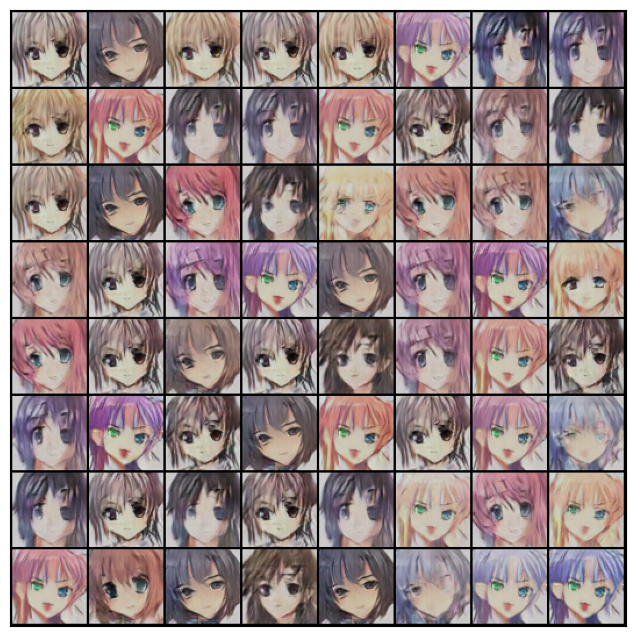

In [16]:
gan.show_images(trained_img.cpu().detach())

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/